# 🤖 NewsBot Intelligence System
## ITAI 2373 - Mid-Term Group Project Template

**Team Members:** [Codie Munos]
**Date:** [7/28/2025]
**GitHub Repository:** [https://github.com/Codiemunos-01/ITAI2373-NewsBot-Midterm]

---

## 🎯 Project Overview

Welcome to your NewsBot Intelligence System! This notebook will guide you through building a comprehensive NLP system that:

- 📰 **Processes** news articles with advanced text cleaning
- 🏷️ **Classifies** articles into categories (Politics, Sports, Technology, Business, Entertainment, Health)
- 🔍 **Extracts** named entities (people, organizations, locations, dates, money)
- 😊 **Analyzes** sentiment and emotional tone
- 📊 **Generates** insights for business intelligence

### 📚 Module Integration Checklist
- [ ] **Module 1:** NLP applications and real-world context
- [ ] **Module 2:** Text preprocessing pipeline
- [ ] **Module 3:** TF-IDF feature extraction
- [ ] **Module 4:** POS tagging analysis
- [ ] **Module 5:** Syntax parsing and semantic analysis
- [ ] **Module 6:** Sentiment and emotion analysis
- [ ] **Module 7:** Text classification system
- [ ] **Module 8:** Named Entity Recognition

---

## 📦 Setup and Installation

Let's start by installing and importing all the libraries we'll need for our NewsBot system.

In [61]:
# Install required packages (run this cell first!)
!pip install spacy scikit-learn nltk pandas matplotlib seaborn wordcloud plotly
!python -m spacy download en_core_web_sm

# Download NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng') # Added this line for POS tagger

print("✅ All packages installed successfully!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 104.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ All packages installed successfully!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [62]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter, defaultdict
import re
import warnings
warnings.filterwarnings('ignore')

# NLP Libraries
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tag import pos_tag

# Scikit-learn for machine learning
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("📚 All libraries imported successfully!")
print(f"🔧 spaCy model loaded: {nlp.meta['name']} v{nlp.meta['version']}")

📚 All libraries imported successfully!
🔧 spaCy model loaded: core_web_sm v3.8.0


## 📊 Data Loading and Exploration

### 🎯 Module 1: Understanding Our NLP Application

Before we dive into the technical implementation, let's understand the real-world context of our NewsBot Intelligence System. This system addresses several business needs:

1. **Media Monitoring:** Automatically categorize and track news coverage
2. **Business Intelligence:** Extract key entities and sentiment trends
3. **Content Management:** Organize large volumes of news content
4. **Market Research:** Understand public sentiment about topics and entities

**💡 Discussion Question:** What other real-world applications can you think of for this type of system? Consider different industries and use cases.

-Weather analyst can utilize this tyoe of system to have a better way of informing the public on newer weather patterns along with how to properly prepare. By analyzing different communities reactions and analyzing the data of damages, these experts can better understand what can save a life in a situation versus something that could be a death sentence.

In [63]:
# Step 1: Install Kaggle API
%pip install kaggle

# Step 2: Upload your kaggle.json file
from google.colab import userdata
print("Please upload your kaggle.json file:")
userdata.get('KAGGLE_API_KEY')
print("✅ Kaggle API setup complete!")

# Step 3: Set up API credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


# Download BBC News Dataset
!kaggle competitions download -c learn-ai-bbc
print("✅ BBC News Dataset downloaded!")

# Unzip the files
!unzip learn-ai-bbc.zip

# List the files to see what we have
!ls -la

# Load the dataset
import pandas as pd
import os

# Check what files are available
print("Available files:")
for file in os.listdir('.'):
    if file.endswith('.csv'):
        print(f"  - {file}")

# Load the main dataset
df = pd.read_csv('BBC News Train.csv')  #filename
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}") # Corrected 'column' to 'columns'
print(f"Categories: {df['Category'].unique()}")

Please upload your kaggle.json file:
✅ Kaggle API setup complete!
learn-ai-bbc.zip: Skipping, found more recently modified local copy (use --force to force download)
✅ BBC News Dataset downloaded!
Archive:  learn-ai-bbc.zip
replace BBC News Sample Solution.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: BBC News Sample Solution.csv  
replace BBC News Test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: BBC News Test.csv       
  inflating: BBC News Train.csv      
total 6876
drwxr-xr-x 1 root root    4096 Aug  5 00:39  .
drwxr-xr-x 1 root root    4096 Aug  4 23:34  ..
-rw-r--r-- 1 root root   10369 Dec  2  2019 'BBC News Sample Solution.csv'
-rw-r--r-- 1 root root 1712432 Dec  2  2019 'BBC News Test.csv'
-rw-r--r-- 1 root root 3351206 Dec  2  2019 'BBC News Train.csv'
drwxr-xr-x 4 root root    4096 Jul 29 13:36  .config
-rw-r--r-- 1 root root      66 Aug  4 23:46  kaggle.json
-rw-r--r-- 1 root root 1936538 Dec  2  2019  learn-ai-bbc.zip
drwxr-xr-x 1 root root    409

📊 OVERVIEW OF DATA
Total articles: 1490
Unique categories: 5
Categories: ['business', 'tech', 'politics', 'sport', 'entertainment']

📈 CATEGORY DISTRIBUTION
Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64


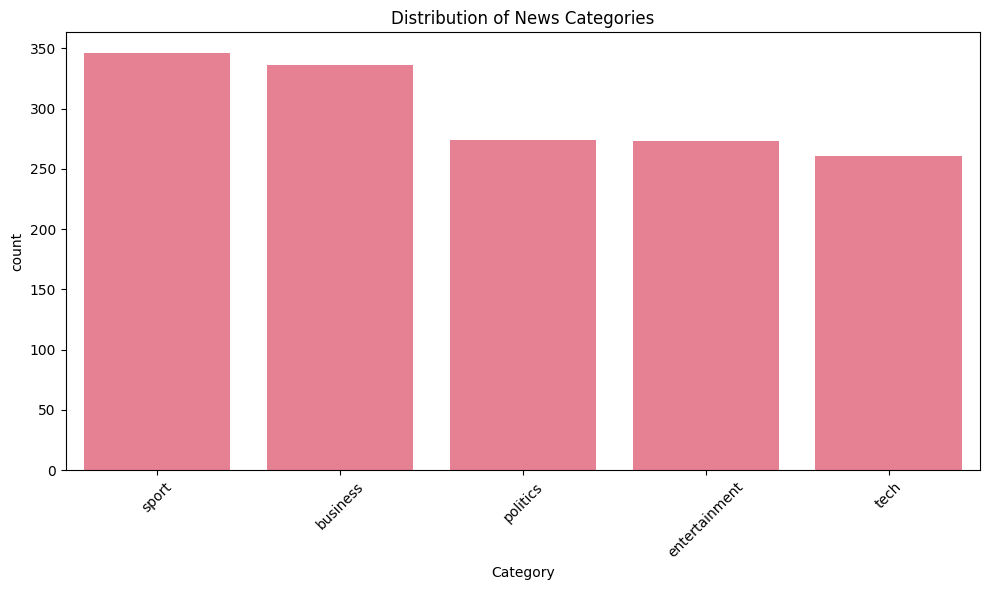


🔍 MISSING VALUES
ArticleId    0
Text         0
Category     0
dtype: int64

📝 TEXT LENGTH DISTRIBUTION


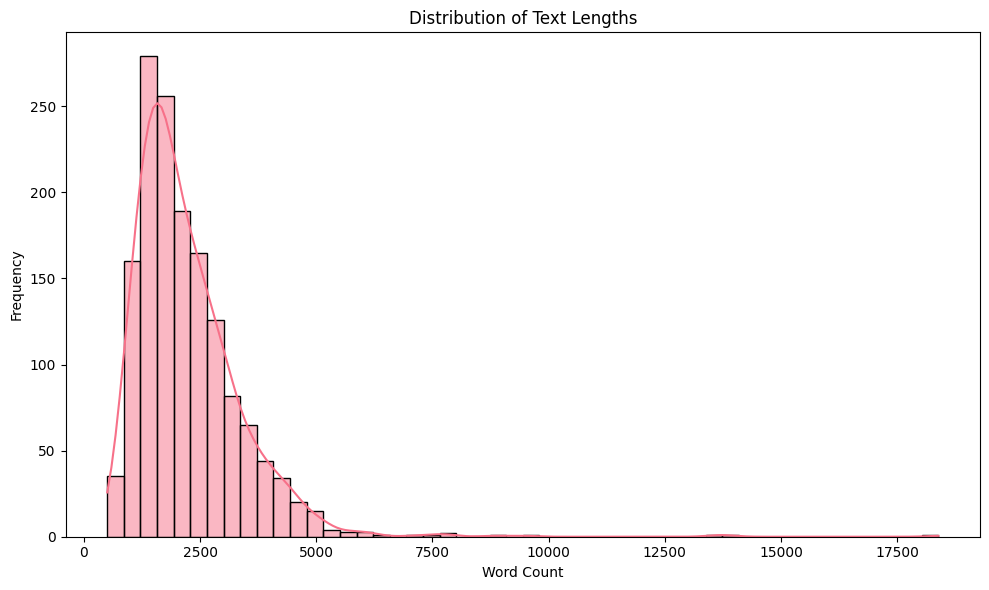


🔍 DATA QUALITY
Duplicate articles: 0


In [64]:
# Basic dataset exploration
print("📊 OVERVIEW OF DATA")
print("=" * 50)
print(f"Total articles: {len(df)}")
print(f"Unique categories: {df['Category'].nunique()}")
print(f"Categories: {df['Category'].unique().tolist()}")
# print(f"Date range: {df['Date'].min()} to {df['Date'].max()}") # Removed as 'Date' column not present
# print(f"Unique sources: {df['Source'].nunique()}") # Removed as 'Source' column not present

print("\n📈 CATEGORY DISTRIBUTION")
print("=" * 50)
category_counts = df['Category'].value_counts() # Corrected 'category' to 'Category'
print(category_counts)

# Visualize category distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', order=category_counts.index) # Corrected 'category' to 'Category'
plt.title('Distribution of News Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Check for missing value
print("\n🔍 MISSING VALUES")
print("=" * 50)
print(df.isnull().sum())

#Text Length Distribution
print("\n📝 TEXT LENGTH DISTRIBUTION")
print("=" * 50)
df['Text_Length'] = df['Text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['Text_Length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#Data quality
print("\n🔍 DATA QUALITY")
print("=" * 50)
print(f"Duplicate articles: {df.duplicated().sum()}")



## 🧹 Text Preprocessing Pipeline

### 🎯 Module 2: Advanced Text Preprocessing

Now we'll implement a comprehensive text preprocessing pipeline that cleans and normalizes our news articles. This is crucial for all downstream NLP tasks.

**Key Preprocessing Steps:**
1. **Text Cleaning:** Remove HTML, URLs, special characters
2. **Tokenization:** Split text into individual words
3. **Normalization:** Convert to lowercase, handle contractions
4. **Stop Word Removal:** Remove common words that don't carry meaning
5. **Lemmatization:** Reduce words to their base form

**💡 Think About:** Why is preprocessing so important? What happens if we skip these steps?

In [65]:
# Initialize preprocessing tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):


    """
    Comprehensive text cleaning function

    💡 TIP: This function should handle:
    - HTML tags and entities
    - URLs and email addresses
    - Special characters and numbers
    - Extra whitespace
    """
    if pd.isna(text):
        return ""

    # Convert to string and lowercase
    text = str(text).lower()

    # 🚀 YOUR CODE HERE: Implement text cleaning
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # Remove special characters and digits (keep only letters and spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

def preprocess_text(text, remove_stopwords=True, lemmatize=True):
    """
    Complete preprocessing pipeline


    """
    # Clean text
    text = clean_text(text)

    if not text:
        return ""

    # 🚀 Implement tokenization and preprocessing
    # Tokenize
    tokens = word_tokenize(text)

    # Remove stop words if requested
    if remove_stopwords:
        tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize if requested
    if lemmatize:
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Filter out very short words
    tokens = [token for token in tokens if len(token) > 2]

    return ' '.join(tokens)

# Test the preprocessing function
sample_text = "bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc world service ..."
print("Original text:")
print(sample_text)
print("\nCleaned text:")
print(clean_text(sample_text))
print("\nFully preprocessed text:")
print(preprocess_text(sample_text))

Original text:
bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc world service ...

Cleaned text:
bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc world service

Fully preprocessed text:
bbc poll indicates economic gloom citizen majority nation surveyed bbc world service


🧹 Preprocessing all articles...
✅ Preprocessing complete!

📝 BEFORE AND AFTER EXAMPLES

Example 1:
Original: worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a ba...
Processed: worldcom exboss launch defence lawyer defending former worldcom chief bernie ebbers battery fraud ch...

Example 2:
Original: german business confidence slides german business confidence fell in february knocking hopes of a sp...
Processed: german business confidence slide german business confidence fell february knocking hope speedy recov...

Example 3:
Original: bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc world service ...
Processed: bbc poll indicates economic gloom citizen majority nation surveyed bbc world service poll believe wo...


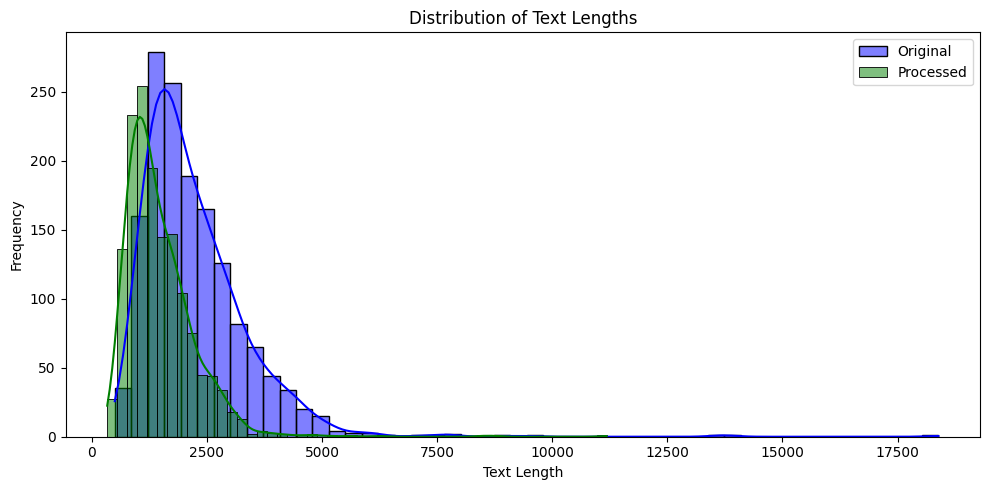

Average original text length: 2233.46
Average processed text length: 1481.36
Unique words in original text: 35594
Unique words in processed text: 22486

🔥 Most common words after preprocessing:
  said: 4838
  year: 1872
  would: 1711
  also: 1426
  new: 1334
  people: 1323
  one: 1190
  could: 1032
  game: 949
  time: 940


In [66]:
# Apply preprocessing to the dataset
print("🧹 Preprocessing all articles...")

# Create new columns for processed text
df['text_clean'] = df['Text'].apply(clean_text)
df['text_processed'] = df['Text'].apply(preprocess_text)

# Combine title and content for full article analysis
df['full_text'] = df['Text'].fillna('')
df['full_text_processed'] = df['text_processed']

print("✅ Preprocessing complete!")

# Show before and after examples
print("\n📝 BEFORE AND AFTER EXAMPLES")
print("=" * 60)
for i in range(min(3, len(df))):
    print(f"\nExample {i+1}:")
    print(f"Original: {df.iloc[i]['full_text'][:100]}...")
    print(f"Processed: {df.iloc[i]['full_text_processed'][:100]}...")

#Calculate average text length before and after
df['original_text_length'] = df['full_text'].str.len()
df['processed_text_length'] = df['full_text_processed'].str.len()

#Visualize text length before and after
plt.figure(figsize=(10,5))
sns.histplot(df['original_text_length'], bins=50, kde=True, label='Original', color='blue')
sns.histplot(df['processed_text_length'], bins=50, kde=True, label='Processed', color='green')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()
print(f"Average original text length: {df['original_text_length'].mean():.2f}")
print(f"Average processed text length: {df['processed_text_length'].mean():.2f}")

#Count unique words before and after
unique_words_original = set(' '.join(df['full_text']).split())
unique_words_processed = set(' '.join(df['full_text_processed']).split())

#Identify the most common words after preprocessing
processed_words_list = ' '.join(df['full_text_processed']).split()
most_common_processed_words = Counter(processed_words_list).most_common(10)


print(f"Unique words in original text: {len(unique_words_original)}")
print(f"Unique words in processed text: {len(unique_words_processed)}")

# most common words after preprocessing
print("\n🔥 Most common words after preprocessing:")
for word, count in most_common_processed_words:
    print(f"  {word}: {count}")

## 📊 Feature Extraction and Statistical Analysis

### 🎯 Module 3: TF-IDF Analysis

Now we'll extract numerical features from our text using TF-IDF (Term Frequency-Inverse Document Frequency). This technique helps us identify the most important words in each document and across the entire corpus.

**TF-IDF Key Concepts:**
- **Term Frequency (TF):** How often a word appears in a document
- **Inverse Document Frequency (IDF):** How rare a word is across all documents
- **TF-IDF Score:** TF × IDF - balances frequency with uniqueness

**💡 Business Value:** TF-IDF helps us identify the most distinctive and important terms for each news category.

In [67]:
# Create TF-IDF vectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_features=4500,  # Limit vocabulary for computational efficiency
    ngram_range=(1, 2), # Include unigrams and bigrams
    min_df=4,  # Ignore terms that appear in less than 2 documents
    max_df=0.2 # Ignore terms that appear in more than 8% of documents
)

# Fit and transform the processed text
print("🔢 Creating TF-IDF features...")
tfidf_matrix = tfidf_vectorizer.fit_transform(df['full_text_processed'])
feature_names = tfidf_vectorizer.get_feature_names_out()

print(f"✅ TF-IDF matrix created!")
print(f"📊 Shape: {tfidf_matrix.shape}")
print(f"📝 Vocabulary size: {len(feature_names)}")
print(f"🔢 Sparsity: {(1 - tfidf_matrix.nnz / (tfidf_matrix.shape[0] * tfidf_matrix.shape[1])) * 100:.2f}%")

# Convert to DataFrame for easier analysis
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
tfidf_df['Category'] = df['Category'].values

print("\n🔍 Sample TF-IDF features:")
print(tfidf_df.iloc[:5, :15])  # Show first 5 rows and 15 features

🔢 Creating TF-IDF features...
✅ TF-IDF matrix created!
📊 Shape: (1490, 4500)
📝 Vocabulary size: 4500
🔢 Sparsity: 97.56%

🔍 Sample TF-IDF features:
   abc  ability     able  abroad  absence  absolute  absolutely  abuse  \
0  0.0      0.0  0.00000     0.0      0.0       0.0         0.0    0.0   
1  0.0      0.0  0.00000     0.0      0.0       0.0         0.0    0.0   
2  0.0      0.0  0.00000     0.0      0.0       0.0         0.0    0.0   
3  0.0      0.0  0.02491     0.0      0.0       0.0         0.0    0.0   
4  0.0      0.0  0.00000     0.0      0.0       0.0         0.0    0.0   

   abused  academy  academy award  accept  acceptable  accepted  access  
0     0.0      0.0            0.0     0.0         0.0       0.0     0.0  
1     0.0      0.0            0.0     0.0         0.0       0.0     0.0  
2     0.0      0.0            0.0     0.0         0.0       0.0     0.0  
3     0.0      0.0            0.0     0.0         0.0       0.0     0.0  
4     0.0      0.0            0.0     

🏷️ TOP TF-IDF TERMS BY CATEGORY

📰 BUSINESS:
  market: 0.0365
  bank: 0.0353
  growth: 0.0344
  share: 0.0335
  economy: 0.0330
  sale: 0.0329
  profit: 0.0292
  oil: 0.0284
  price: 0.0284
  rate: 0.0281

📰 TECH:
  mobile: 0.0538
  phone: 0.0498
  technology: 0.0444
  user: 0.0403
  service: 0.0392
  software: 0.0382
  computer: 0.0364
  net: 0.0334
  microsoft: 0.0314
  digital: 0.0313

📰 POLITICS:
  labour: 0.0671
  election: 0.0628
  blair: 0.0577
  party: 0.0554
  tory: 0.0478
  minister: 0.0443
  brown: 0.0394
  tax: 0.0339
  lord: 0.0329
  howard: 0.0314

📰 SPORT:
  england: 0.0389
  win: 0.0356
  player: 0.0340
  match: 0.0318
  champion: 0.0306
  cup: 0.0289
  team: 0.0271
  chelsea: 0.0271
  injury: 0.0259
  side: 0.0258

📰 ENTERTAINMENT:
  film: 0.1035
  award: 0.0536
  best: 0.0472
  star: 0.0397
  show: 0.0394
  music: 0.0372
  band: 0.0368
  actor: 0.0351
  album: 0.0309
  oscar: 0.0285

🌎 WORD CLOUDS FOR EACH CATEGORY


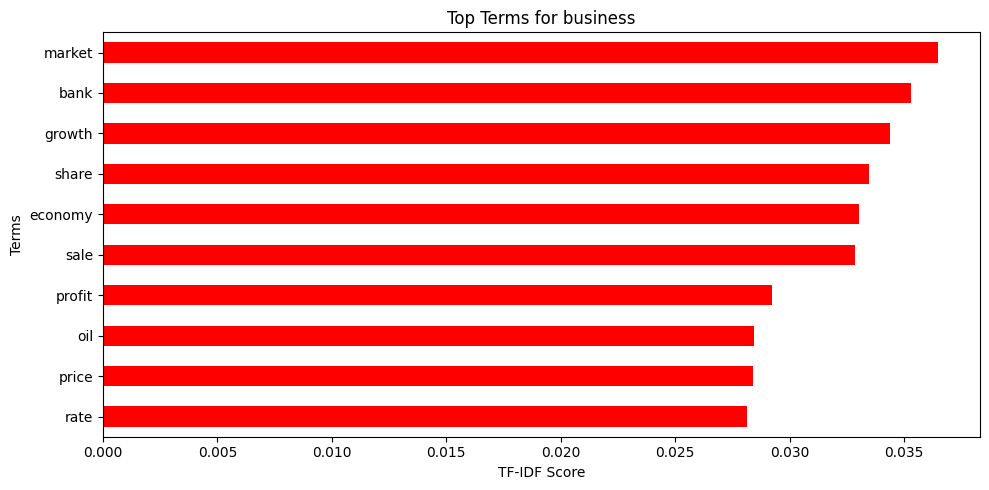

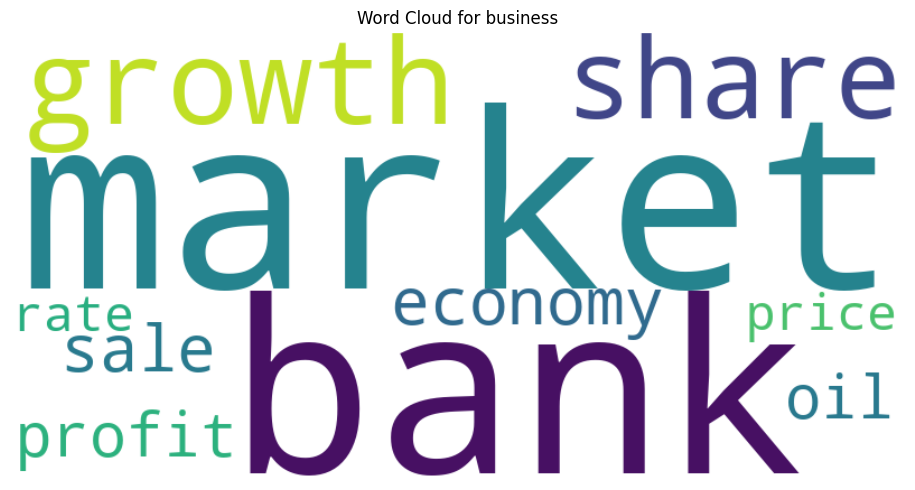

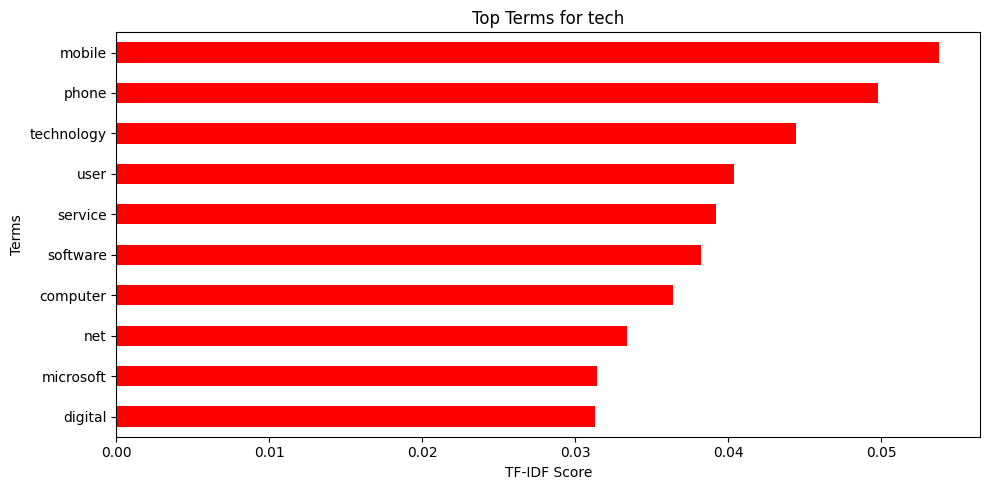

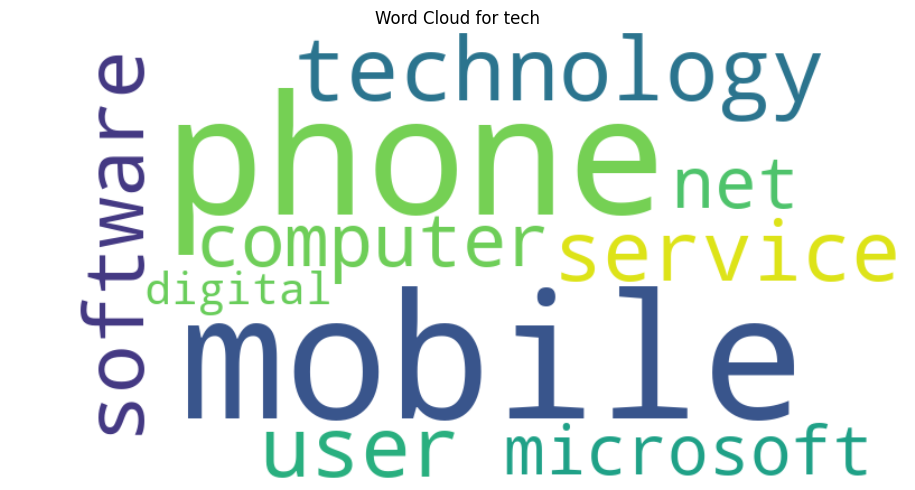

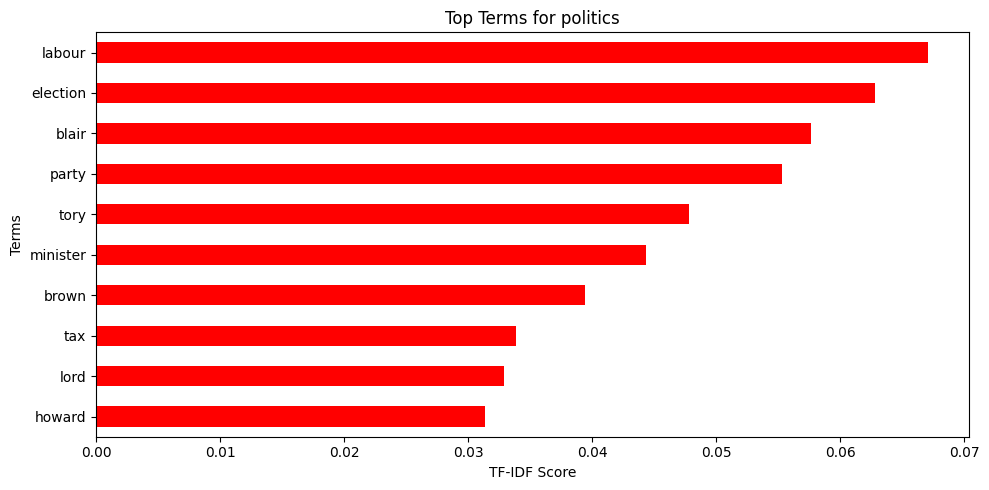

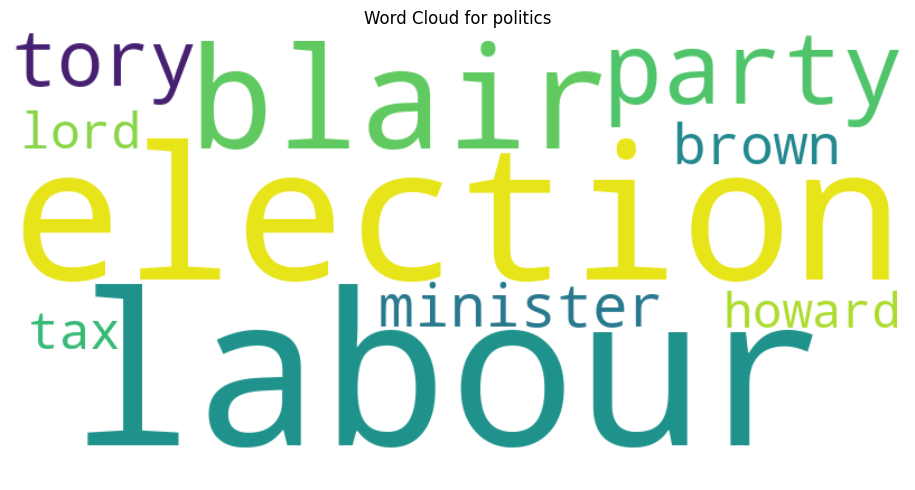

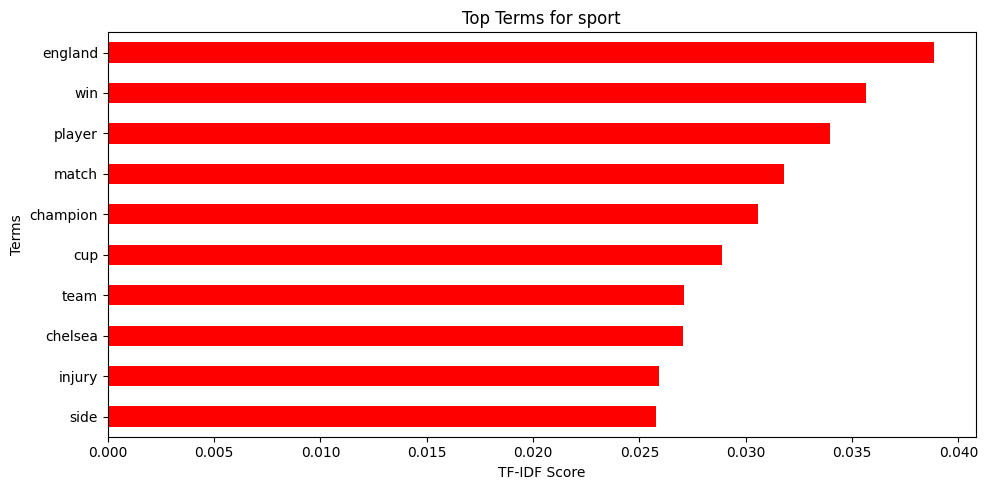

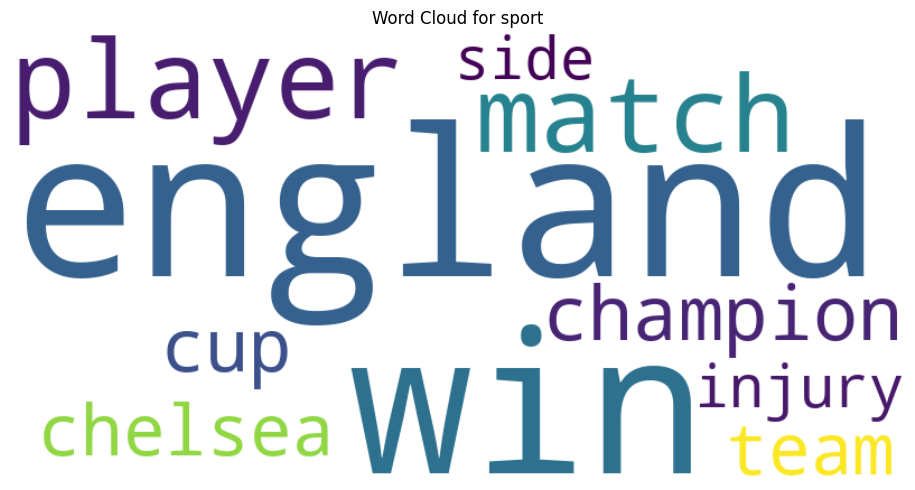

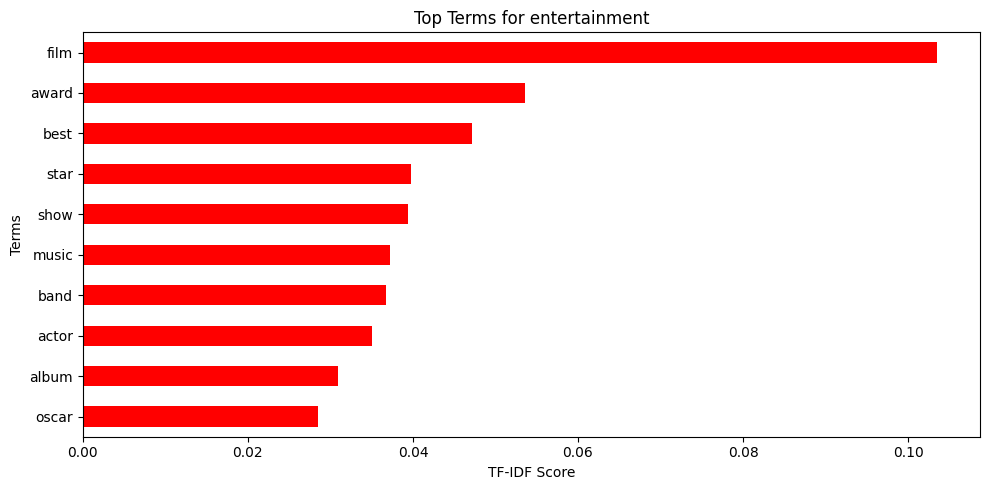

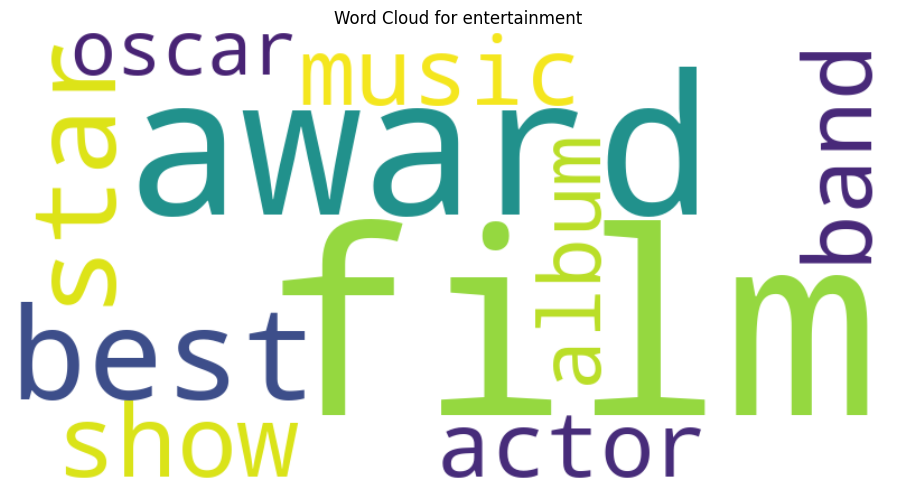

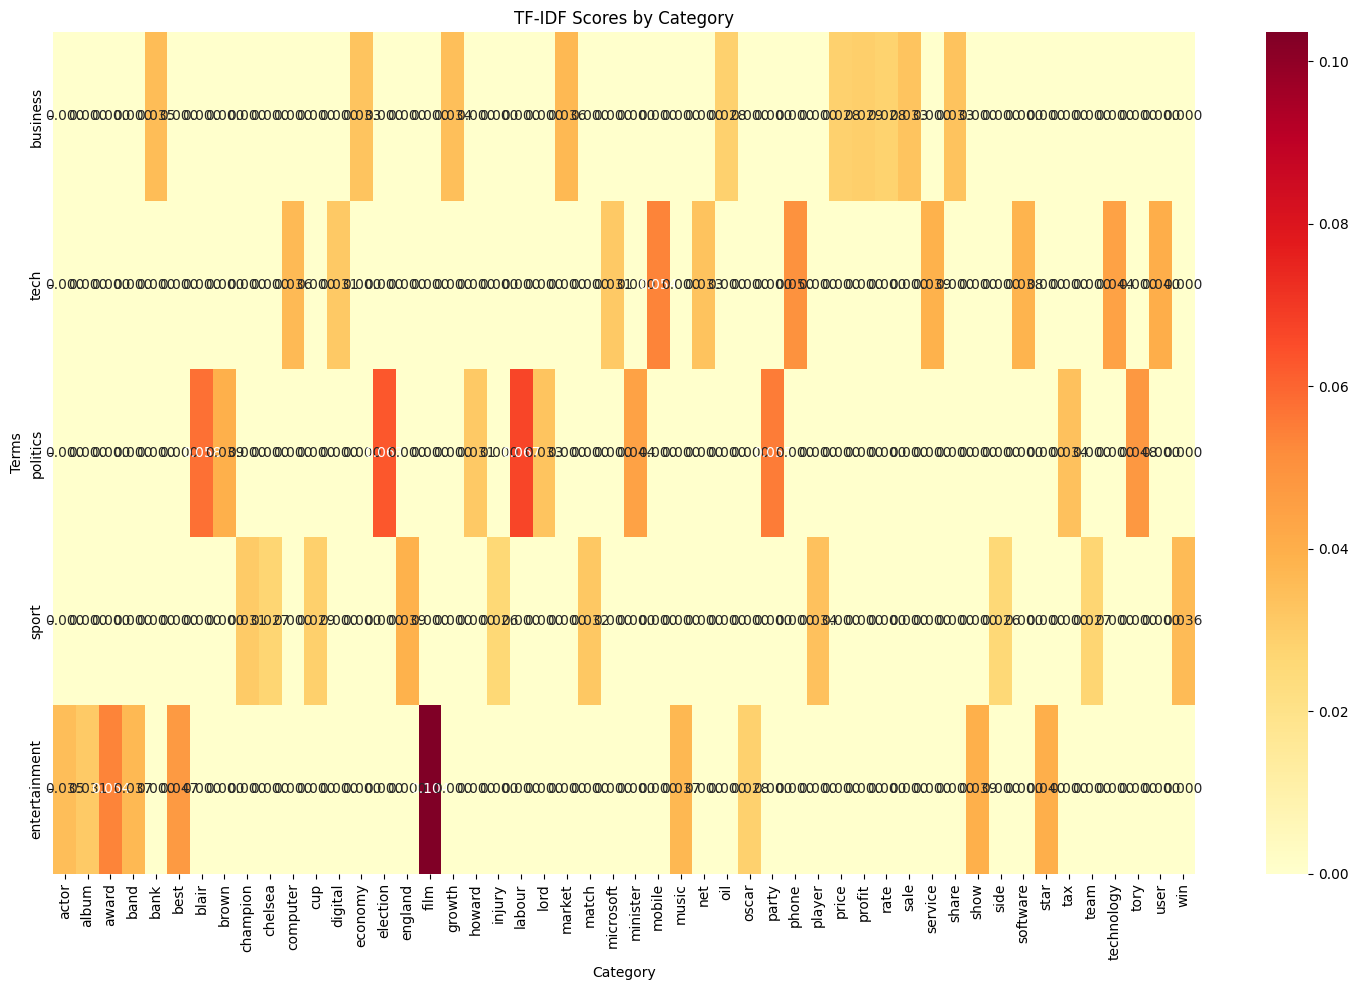

In [68]:
# Analyze most important terms per category
def get_top_tfidf_terms(category, n_terms=10):
    """
    Get top TF-IDF terms for a specific category


    """
    # 🚀 Implement category-specific TF-IDF analysis
    category_data = tfidf_df[tfidf_df['Category'] == category]

    # Calculate mean TF-IDF scores for this category
    mean_scores = category_data.drop('Category', axis=1).mean().sort_values(ascending=False)

    return mean_scores.head(n_terms)

# Analyze top terms for each category
print("🏷️ TOP TF-IDF TERMS BY CATEGORY")
print("=" * 50)

categories = df['Category'].unique()
category_terms = {}

for category in categories:
    top_terms = get_top_tfidf_terms(category, n_terms=10)
    category_terms[category] = top_terms

    print(f"\n📰 {category.upper()}:")
    for term, score in top_terms.items():
        print(f"  {term}: {score:.4f}")

#Visualize top terms
def plot_bar_chart(category, terms_scores):
    plt.figure(figsize=(10,5))
    terms_scores.sort_values().plot(kind='barh', color='red') #started with sky blue, but changed to red due to visual preferences
    plt.title(f'Top Terms for {category}')
    plt.xlabel('TF-IDF Score')
    plt.ylabel('Terms')
    plt.tight_layout()


#Word clouds for each category
print("\n🌎 WORD CLOUDS FOR EACH CATEGORY")
print("=" * 50)
def plot_worldcloud(category, terms_scores):
  wc = WordCloud(background_color='white', width=800, height=400)
  wc.generate_from_frequencies(terms_scores.to_dict())
  plt.figure(figsize=(10, 5))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis('off')
  plt.title(f'Word Cloud for {category}')
  plt.tight_layout()


# Plotting the visualizations
for category, terms in category_terms.items():
    plot_bar_chart(category, terms)
    plt.show() # Show the bar chart
    plot_worldcloud(category, terms)
    plt.show() # Show the word cloud

# Heatmap
heatmap_df = pd.DataFrame(category_terms).fillna(0)
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_df.T, annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('TF-IDF Scores by Category')
plt.xlabel('Category')
plt.ylabel('Terms')
plt.tight_layout()


## 🏷️ Part-of-Speech Analysis

### 🎯 Module 4: Grammatical Pattern Analysis

Let's analyze the grammatical patterns in different news categories using Part-of-Speech (POS) tagging. This can reveal interesting differences in writing styles between categories.

**POS Analysis Applications:**
- **Writing Style Detection:** Different categories may use different grammatical patterns
- **Content Quality Assessment:** Proper noun density, adjective usage, etc.
- **Feature Engineering:** POS tags can be features for classification

**💡 Hypothesis:** Sports articles might have more action verbs, while business articles might have more numbers and proper nouns.

In [69]:
def analyze_pos_patterns(text):
    """
    Analyze POS patterns in text

    """
    if not text or pd.isna(text):
        return {}

    # 🚀 Implement POS analysis
    # Tokenize and tag
    tokens = word_tokenize(str(text))
    pos_tags = pos_tag(tokens)

    # Count POS categories
    pos_counts = Counter([tag for word, tag in pos_tags])
    total_words = len(pos_tags)

    if total_words == 0:
        return {}

    # Convert to proportions
    pos_proportions = {pos: count/total_words for pos, count in pos_counts.items()}

    return pos_proportions

# Apply POS analysis to all articles
print("🏷️ Analyzing POS patterns...")

# Analyze POS for each article
pos_results = []
for idx, row in df.iterrows():
    pos_analysis = analyze_pos_patterns(text=row['Text'])
    pos_analysis['Category'] = row['Category']
    pos_analysis['Article_ID'] = row['ArticleId']
    pos_results.append(pos_analysis)

# Convert to DataFrame
pos_df = pd.DataFrame(pos_results).fillna(0)

print(f"✅ POS analysis complete!")
print(f"📊 Found {len(pos_df.columns)-2} different POS tags")

# Show sample results
print("\n📝 Sample POS analysis:")
print(pos_df.head())

🏷️ Analyzing POS patterns...
✅ POS analysis complete!
📊 Found 43 different POS tags

📝 Sample POS analysis:
         JJ       NNS        NN       VBG        IN        DT       VBP  \
0  0.088608  0.113924  0.231013  0.025316  0.110759  0.066456  0.015823   
1  0.119883  0.070175  0.233918  0.032164  0.134503  0.081871  0.014620   
2  0.079044  0.079044  0.200368  0.025735  0.119485  0.095588  0.016544   
3  0.083582  0.107463  0.156716  0.022388  0.122388  0.062687  0.041791   
4  0.089005  0.078534  0.212042  0.028796  0.123037  0.102094  0.015707   

        VBN      PRP$         .  ...   FW  SYM  WP$  NNP  NNPS  POS   UH    #  \
0  0.041139  0.012658  0.037975  ...  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
1  0.029240  0.005848  0.040936  ...  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
2  0.029412  0.016544  0.040441  ...  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
3  0.017910  0.013433  0.046269  ...  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
4  0.026178  0.015707  0.041885  ...

📊 POS PATTERNS BY CATEGORY

🎯 Key POS patterns by category:
                   NN     NNS     NNP    NNPS      VB     VBD     VBG     VBN  \
Category                                                                        
business       0.2241  0.0736  0.0011  0.0000  0.0333  0.0410  0.0200  0.0277   
entertainment  0.2454  0.0574  0.0008  0.0000  0.0281  0.0462  0.0194  0.0295   
politics       0.2087  0.0679  0.0007  0.0003  0.0455  0.0462  0.0209  0.0302   
sport          0.2184  0.0479  0.0005  0.0000  0.0408  0.0457  0.0175  0.0247   
tech           0.1932  0.0855  0.0006  0.0000  0.0420  0.0299  0.0236  0.0270   

                  VBP     VBZ      JJ     JJR     JJS      RB     RBR     RBS  \
Category                                                                        
business       0.0158  0.0241  0.0920  0.0045  0.0033  0.0276  0.0018  0.0006   
entertainment  0.0179  0.0223  0.0939  0.0024  0.0050  0.0286  0.0010  0.0010   
politics       0.0199  0.0224  0.0901  0.0032  0

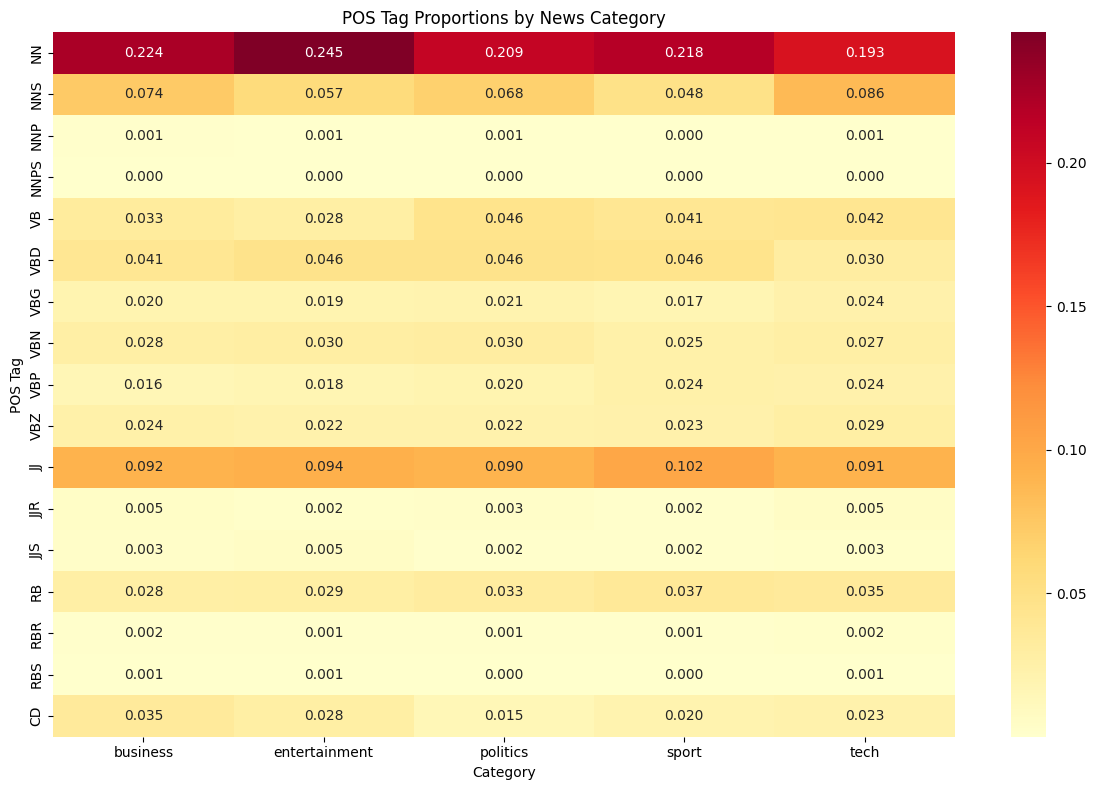


💡 ANALYSIS QUESTIONS:
1. Which category has the highest proportion of proper nouns (NNP/NNPS)?: Business has the highest proportiom of proper nouns
2. Which category uses the most action verbs (VB, VBD, VBG)?: Politics had the most action verbs.
3. Are there interesting patterns in adjective (JJ) usage?: Yes, sports has the highest which is not surprising.
4. How does number (CD) usage vary across categories?: Numbers in business are used in every aspect of the category.
From stocks, market forecasts, earning reports and more. This is most likely why it dominates in frequency.
I was surprised to see that entertainment was the second highest. I assume with would have to be related to seasons and episodes.
The one with the least frequency was Politics. I thought it would not be last due to poll numbers being such a large part of the community.


In [70]:
# Analyze POS patterns by category
print("📊 POS PATTERNS BY CATEGORY")
print("=" * 50)

# Group by category and calculate mean proportions
pos_by_category = pos_df.groupby('Category').mean()

# Focus on major POS categories
major_pos = ['NN', 'NNS', 'NNP', 'NNPS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ',
             'JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS', 'CD']

# Filter to only include major POS tags that exist in our data
available_pos = [pos for pos in major_pos if pos in pos_by_category.columns]

if available_pos:
    pos_summary = pos_by_category[available_pos]

    print("\n🎯 Key POS patterns by category:")
    print(pos_summary.round(4))

    # Create visualization
    plt.figure(figsize=(12, 8))
    sns.heatmap(pos_summary.T, annot=True, cmap='YlOrRd', fmt='.3f')
    plt.title('POS Tag Proportions by News Category')
    plt.xlabel('Category')
    plt.ylabel('POS Tag')
    plt.tight_layout()
    plt.show()


    print("\n💡 ANALYSIS QUESTIONS:")
    print("1. Which category has the highest proportion of proper nouns (NNP/NNPS)?: Business has the highest proportiom of proper nouns")
    print("2. Which category uses the most action verbs (VB, VBD, VBG)?: Politics had the most action verbs.")
    print("3. Are there interesting patterns in adjective (JJ) usage?: Yes, sports has the highest which is not surprising.")
    print("4. How does number (CD) usage vary across categories?: Numbers in business are used in every aspect of the category.")
    print("From stocks, market forecasts, earning reports and more. This is most likely why it dominates in frequency.")
    print("I was surprised to see that entertainment was the second highest. I assume with would have to be related to seasons and episodes.")
    print("The one with the least frequency was Politics. I thought it would not be last due to poll numbers being such a large part of the community.")
else:
    print("⚠️ No major POS tags found in the analysis. Check your POS tagging implementation.")

## 🌳 Syntax Parsing and Semantic Analysis

### 🎯 Module 5: Understanding Sentence Structure

Now we'll use spaCy to perform dependency parsing and extract semantic relationships from our news articles. This helps us understand not just what words are present, but how they relate to each other.

**Dependency Parsing Applications:**
- **Relationship Extraction:** Find connections between entities
- **Event Detection:** Identify who did what to whom
- **Information Extraction:** Extract structured facts from unstructured text

**💡 Business Value:** Understanding sentence structure helps extract more precise information about events, relationships, and actions mentioned in news articles.

In [71]:
def extract_syntactic_features(text):
    """
    Extract syntactic features using spaCy dependency parsing

    """
    if not text or pd.isna(text):
        return {}

    # Process text with spaCy
    doc = nlp(str(text))

    features = {
        'num_sentences': len(list(doc.sents)),
        'num_tokens': len(doc),
        'dependency_relations': [],
        'noun_phrases': [],
        'verb_phrases': [],
        'subjects': [],
        'objects': []
    }

    # 🚀 Extract syntactic features

    # Extract dependency relations
    for token in doc:
        if not token.is_space and not token.is_punct:
            features['dependency_relations'].append(token.dep_)

    # Extract noun phrases
    for chunk in doc.noun_chunks:
        features['noun_phrases'].append(chunk.text.lower())

    # Extract verb phrases
    for chunk in doc.noun_chunks:
            features['verb_phrases'].append(chunk.text.lower())

    # Extract subjects and objects
    for token in doc:
        if token.dep_ in ['nsubj', 'nsubjpass']:  # Subjects
            features['subjects'].append(token.text.lower())
        elif token.dep_ in ['dobj', 'iobj', 'pobj']:  # Objects
            features['objects'].append(token.text.lower())

    # Count dependency types
    dep_counts = Counter(features['dependency_relations'])
    features['dependency_counts'] = dict(dep_counts)

    return features

# Apply syntactic analysis to sample articles
print("🌳 Performing syntactic analysis...")

# Analyze first few articles
syntactic_results = []
for idx, row in df.head(5).iterrows():
    features = extract_syntactic_features(row['full_text'])
    features['Category'] = row['Category']
    features['Article_Id'] = row['ArticleId']
    syntactic_results.append(features)

print("✅ Syntactic analysis complete!")

# Display results
for i, result in enumerate(syntactic_results):
    print(f"\n📰 Article {i+1} ({result['Category']}):")
    print(f"  Sentences: {result['num_sentences']}")
    print(f"  Tokens: {result['num_tokens']}")
    print(f"  Noun phrases: {result['noun_phrases'][:20]}...")  # Show first 20
    print(f"  Verb phrases: {result['verb_phrases'][:20]}...") # Show first 20
    print(f"  Subjects: {result['subjects'][:20]}...")  # Show first 20
    print(f"  Objects: {result['objects'][:20]}...")  # Show first 20

🌳 Performing syntactic analysis...
✅ Syntactic analysis complete!

📰 Article 1 (business):
  Sentences: 15
  Tokens: 346
  Noun phrases: ['-', 'boss', 'defence lawyers', 'former worldcom chief bernie ebbers', 'a battery', 'fraud charges', 'a company', 'their first witness', 'cynthia cooper', 'worldcom', 'ex', '-', 'head', 'internal accounting', 'directors', 'irregular accounting practices', 'her warnings', 'the collapse', 'the firm', 'the discovery']...
  Verb phrases: ['-', 'boss', 'defence lawyers', 'former worldcom chief bernie ebbers', 'a battery', 'fraud charges', 'a company', 'their first witness', 'cynthia cooper', 'worldcom', 'ex', '-', 'head', 'internal accounting', 'directors', 'irregular accounting practices', 'her warnings', 'the collapse', 'the firm', 'the discovery']...
  Subjects: ['-', 'boss', 'worldcom', 's', 'warnings', 'ebbers', 'lawyers', 'ebbers', 'cooper', 'who', 'andersen', 'she', 'andersen', 'lawyers', 'he', 'auditors', 'cooper', 'ebbers', 'witness', 'sullivan']

📝 Sample sentence: worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used b


📊 Syntactic Complexity by Category:
          Sentence_Count  Token_Count  Noun_Count  Subject_Count  Object_Count
business           17.75        429.5        98.5           36.5          58.0
tech               31.00        724.0       176.0           68.0         101.0


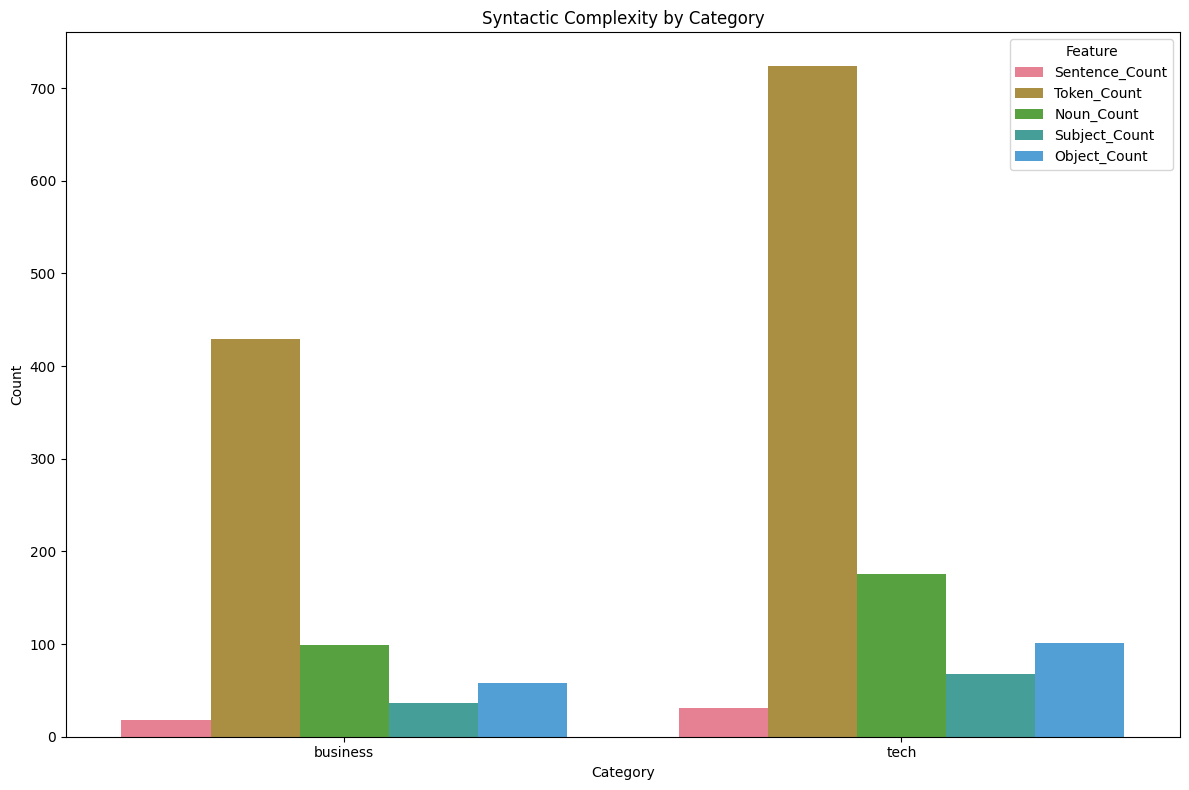

Top 10 dependency relations by category:
  • business: prep, pobj, det, compound, nsubj
  • entertainment: prep, pobj, compound, det, nsubj
  • politics: prep, det, pobj, nsubj, compound
  • sport: prep, pobj, nsubj, det, compound
  • tech: prep, pobj, det, nsubj, amod


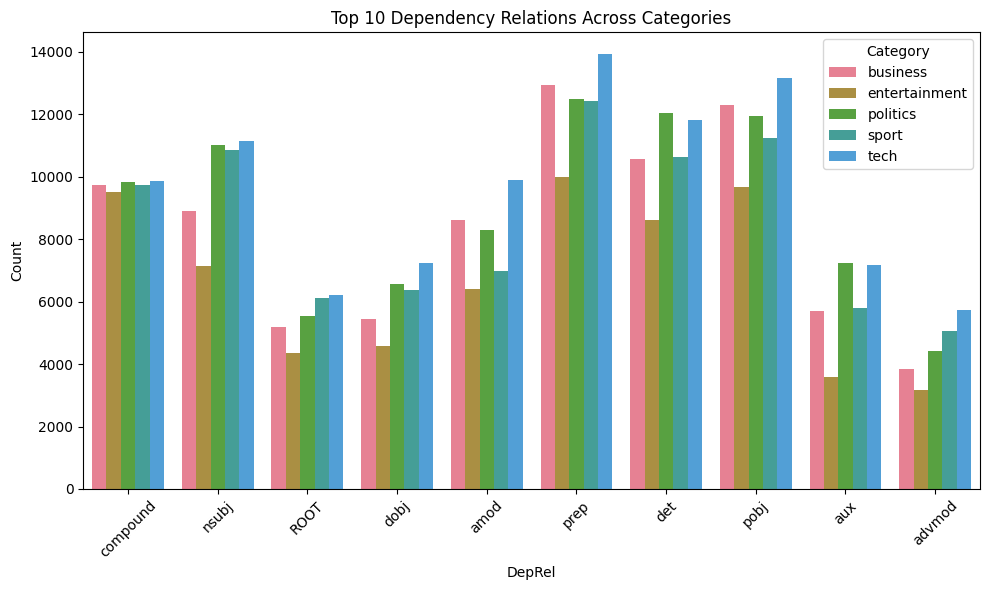

In [72]:
# Visualize dependency parsing for a sample sentence
from spacy import displacy

# Choose a sample sentence
sample_sentence = df.iloc[0]['full_text']
print(f"📝 Sample sentence: {sample_sentence}")

# Process with spaCy
doc = nlp(sample_sentence)

# Display dependency tree (this works best in Jupyter)
print("\n🌳 Dependency Parse Visualization:")
try:
    # This will create an interactive visualization in Jupyter
    displacy.render(doc, style="dep", jupyter=True)
except:
    # Fallback: print dependency information
    print("\n🔗 Dependency Relations:")
    for token in doc:
        if not token.is_space and not token.is_punct:
            print(f"  {token.text} --> {token.dep_} --> {token.head.text}")

# Compare syntactic complexity
print("\n📊 Syntactic Complexity by Category:")
complexity_stats = defaultdict(lambda: defaultdict(list))
for idx, row in df.head().iterrows():
    features = extract_syntactic_features(row['full_text'])
    complexity_stats[row['Category']]['Sentence_Count'].append(features['num_sentences'])
    complexity_stats[row['Category']]['Token_Count'].append(features['num_tokens'])
    complexity_stats[row['Category']]['Noun_Count'].append(len(features['noun_phrases']))
    complexity_stats[row['Category']]['Subject_Count'].append(len(features['subjects']))
    complexity_stats[row['Category']]['Object_Count'].append(len(features['objects']))

complexity_df = pd.DataFrame(complexity_stats).T

# Calculate the mean of the lists in each cell
complexity_df_mean = complexity_df.applymap(lambda x: np.mean(x) if isinstance(x, list) else x)

print(complexity_df_mean.round(2))

#visualize syntatic complexity
plt.figure(figsize=(12, 8))
sns.barplot(data=complexity_df_mean.melt(ignore_index=False).reset_index(),
            x='index', y='value', hue='variable')
plt.title('Syntactic Complexity by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Feature')
plt.tight_layout()
plt.show()

#extract action patterns
def extract_svo_patterns(text):
  doc = nlp(text)
  svo_triples = []
  for sent in doc.sent: #this will be to look for main verbs
      for tokenm in sent:
        if token.pos_ == 'VERB' and token.dep_ == "ROOT":
          subject = [w for w in token.lefts if w.dep_ in ("nsubj", "nsubjpass")]
          object = [w for w in token.rights if w.dep_ in ("dobj", "iobj", "pobj")]
          if subject and object:
            svo_triples.append((subject[0].text, token.text, object[0].text))
  return svo_triples
def plot_svo_graph(svo_triples):
    G = nx.Digraph()
    for triple in svo_triples:
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_color='black', arrows=True)
    plt.title("Action Patterns")
    plt.show()

#identify most common dependency relations per category:
from collections import Counter

def count_deps_in_doc(text):
    doc = nlp(text)
    return Counter([tok.dep_ for tok in doc if not tok.is_punct and not tok.is_space])

# Build a list of dicts: one per document
records = []
for idx, row in df.iterrows():
    dep_counts = count_deps_in_doc(row['full_text'])
    dep_counts['Category'] = row['Category']
    records.append(dep_counts)

# Create a DataFrame where each column is a dep label and rows are docs
dep_df = pd.DataFrame(records).fillna(0)

# Group by category, summing all dependency counts
agg_by_cat = dep_df.groupby('Category').sum()

# Drop the non-dependency column if present
agg_by_cat = agg_by_cat.drop(columns=['Category'], errors='ignore')

top_n = 5
top_deps_per_cat = {
    cat: df_row.nlargest(top_n).index.tolist()
    for cat, df_row in agg_by_cat.iterrows()
}

print("Top 10 dependency relations by category:")
for cat, deps in top_deps_per_cat.items():
    print(f"  • {cat}: {', '.join(deps)}")

#Visualize the common dependency
import seaborn as sns
import matplotlib.pyplot as plt

# Melt for plotting
melted = agg_by_cat.reset_index().melt(
    id_vars='Category',
    var_name='DepRel',
    value_name='Count'
)

# Keep only the top M relations overall
top_global = (
    melted.groupby('DepRel')['Count']
          .sum()
          .nlargest(10)
          .index
)
plot_df = melted[melted['DepRel'].isin(top_global)]

plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x='DepRel', y='Count', hue='Category')
plt.xticks(rotation=45)
plt.title("Top 10 Dependency Relations Across Categories")
plt.tight_layout()
plt.show()

import numpy as np
from collections import Counter

#Create features for classification based on syntax
def extract_syntax_features(text, nlp):
    """
    Returns a dict of syntactic features for a single document.
    """
    doc = nlp(text)
    feats = {}

    # Part-of-Speech Counts
    pos_counts = Counter(tok.pos_ for tok in doc if not tok.is_punct and not tok.is_space)
    for pos in ['NOUN', 'VERB', 'ADJ', 'ADV', 'PRON', 'PROPN']:
        feats[f'POS_{pos}'] = pos_counts.get(pos, 0)

    # Dependency Relation Counts
    dep_counts = Counter(tok.dep_ for tok in doc if not tok.is_punct and not tok.is_space)
    for dep in ['nsubj', 'dobj', 'amod', 'ROOT', 'prep', 'pobj', 'advmod']:
        feats[f'DEP_{dep}'] = dep_counts.get(dep, 0)

    # Dependency Tree Depth (per sentence)
    def depth(token):
        if not list(token.children):
            return 1
        return 1 + max(depth(child) for child in token.children)

    depths = [depth(sent.root) for sent in doc.sents]
    feats['max_tree_depth'] = max(depths) if depths else 0
    feats['avg_tree_depth'] = np.mean(depths) if depths else 0

    # Average Dependency Distance
    dists = [abs(tok.i - tok.head.i) for tok in doc if tok.head != tok]
    feats['mean_dep_distance'] = np.mean(dists) if dists else 0

    #  SVO Pattern Count
    svo_triples = []
    for sent in doc.sents:
        for tok in sent:
            if tok.pos_ == 'VERB' and tok.dep_ == 'ROOT':
                subj = [w for w in tok.lefts if w.dep_ in ('nsubj','nsubjpass')]
                obj  = [w for w in tok.rights if w.dep_ in ('dobj','iobj','pobj')]
                if subj and obj:
                    svo_triples.append((subj[0].text, tok.text, obj[0].text))
    feats['num_svo'] = len(svo_triples)

    # Sentence Count
    feats['num_sentences'] = len(list(doc.sents))

    return feats


## 😊 Sentiment and Emotion Analysis

### 🎯 Module 6: Understanding Emotional Tone

Let's analyze the sentiment and emotional tone of our news articles. This can reveal interesting patterns about how different types of news are presented and perceived.

**Sentiment Analysis Applications:**
- **Media Bias Detection:** Identify emotional slant in news coverage
- **Public Opinion Tracking:** Monitor sentiment trends over time
- **Content Recommendation:** Suggest articles based on emotional tone

**💡 Hypothesis:** Different news categories might have different emotional profiles - sports might be more positive, politics more negative, etc.

In [73]:
# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    """
    Analyze sentiment using VADER sentiment analyzer

    """
    if not text or pd.isna(text):
        return {'compound': 0, 'pos': 0, 'neu': 1, 'neg': 0}

    # 🚀  Implement sentiment analysis
    scores = sia.polarity_scores(str(text))

    # Add interpretation
    if scores['compound'] >= 0.05:
        scores['sentiment_label'] = 'positive'
    elif scores['compound'] <= -0.05:
        scores['sentiment_label'] = 'negative'
    else:
        scores['sentiment_label'] = 'neutral'

    return scores

# Apply sentiment analysis to all articles
print("😊 Analyzing sentiment...")

sentiment_results = []
for idx, row in df.iterrows():
    # Analyze the full text column
    full_sentiment = analyze_sentiment(row['full_text'])

    result = {
        'article_id': row['ArticleId'],
        'category': row['Category'],
        'full_sentiment': full_sentiment['compound'],
        'full_label': full_sentiment['sentiment_label'],
        'pos_score': full_sentiment['pos'],
        'neu_score': full_sentiment['neu'],
        'neg_score': full_sentiment['neg']
    }
    sentiment_results.append(result)

# Convert to DataFrame
sentiment_df = pd.DataFrame(sentiment_results)

print("✅ Sentiment analysis complete!")
print(f"📊 Analyzed {len(sentiment_df)} articles")

# Display sample results
print("\n📝 Sample sentiment results:")
print(sentiment_df[['category', 'full_sentiment', 'full_label']].head())

😊 Analyzing sentiment...
✅ Sentiment analysis complete!
📊 Analyzed 1490 articles

📝 Sample sentiment results:
   category  full_sentiment full_label
0  business         -0.9701   negative
1  business          0.7623   positive
2  business         -0.9318   negative
3      tech          0.9554   positive
4  business         -0.9486   negative


📊 SENTIMENT ANALYSIS BY CATEGORY

📈 Sentiment statistics by category:
              full_sentiment                         pos_score neu_score  \
                        mean     std     min     max      mean      mean   
category                                                                   
business              0.2404  0.8370 -0.9985  0.9995    0.0926    0.8370   
entertainment         0.5991  0.6796 -0.9978  0.9999    0.1356    0.8107   
politics              0.0578  0.8811 -0.9984  0.9999    0.0947    0.8184   
sport                 0.5541  0.7244 -0.9967  0.9996    0.1360    0.7933   
tech                  0.5233  0.7557 -0.9991  0.9993    0.0895    0.8598   

              neg_score  
                   mean  
category                 
business         0.0704  
entertainment    0.0537  
politics         0.0869  
sport            0.0707  
tech             0.0507  

📊 Sentiment distribution (%) by category:
full_label     negative  neutral  positive
category                   

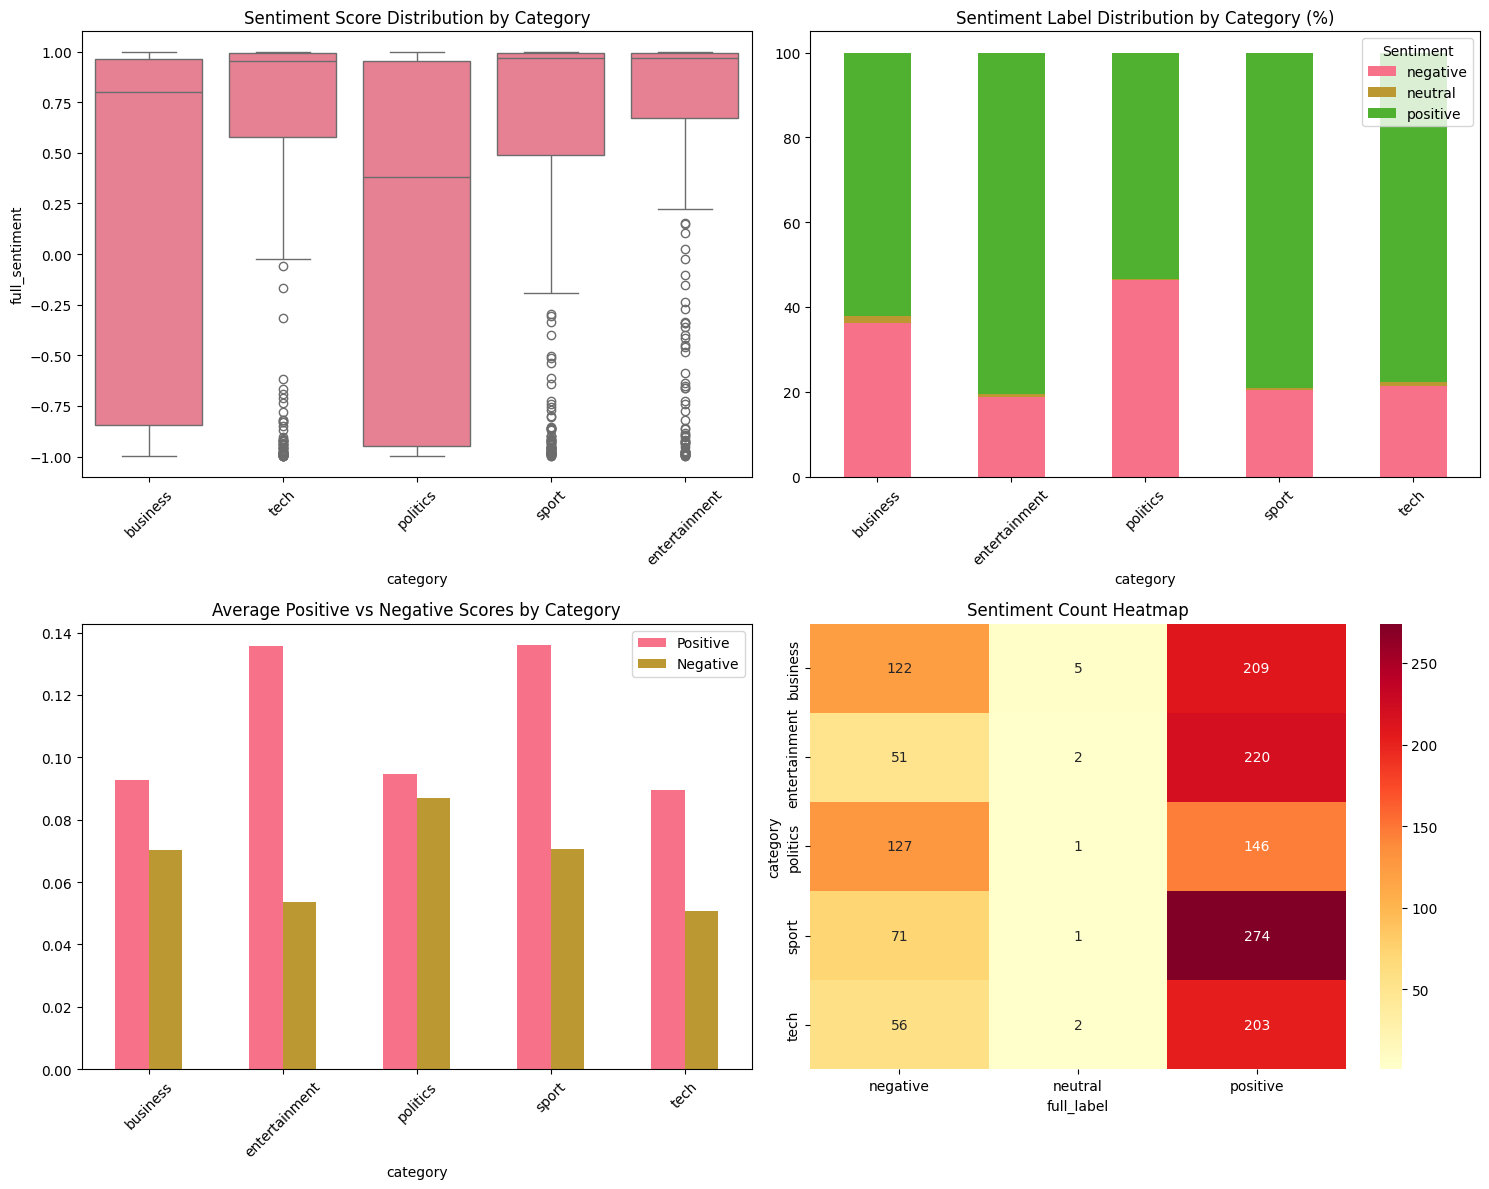

Which categories are most positive/negative?: The most positive categories are entertainment and tech! The most negative categories are politics and business which were expected. 
Are there differences between title and content sentiment?: There is no title or content column in the dataset, so this analysis cannot be performed.
How does sentiment vary within categories?: Politics ended up being even for the most part, with positive sentiment being at 46.35 and negative being at 53.28. The other categories haing lower than a 62 for positive
Can sentiment be used as a feature for classification?: Due to the powerful semantic signals, yes it can be used as a feature for classification. It adds that extra bump of emotional analysis and helps to flag spam.


In [74]:
# Analyze sentiment patterns by category
print("📊 SENTIMENT ANALYSIS BY CATEGORY")
print("=" * 50)

from nltk.sentiment.vader import SentimentIntensityAnalyzer


#initialize
vader = SentimentIntensityAnalyzer()


import pandas as pd

# Calculate sentiment statistics by category
sentiment_by_category = sentiment_df.groupby('category').agg({
    'full_sentiment': ['mean', 'std', 'min', 'max'],
    'pos_score': 'mean',
    'neu_score': 'mean',
    'neg_score': 'mean'
}).round(4)

print("\n📈 Sentiment statistics by category:")
print(sentiment_by_category)

# Sentiment distribution by category
sentiment_dist = sentiment_df.groupby(['category', 'full_label']).size().unstack(fill_value=0)
sentiment_dist_pct = sentiment_dist.div(sentiment_dist.sum(axis=1), axis=0) * 100

print("\n📊 Sentiment distribution (%) by category:")
print(sentiment_dist_pct.round(2))

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Sentiment scores by category
sns.boxplot(data=sentiment_df, x='category', y='full_sentiment', ax=axes[0,0])
axes[0,0].set_title('Sentiment Score Distribution by Category')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Sentiment label distribution
sentiment_dist_pct.plot(kind='bar', ax=axes[0,1], stacked=True)
axes[0,1].set_title('Sentiment Label Distribution by Category (%)')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].legend(title='Sentiment')

# 3. Positive vs Negative scores
category_means = sentiment_df.groupby('category')[['pos_score', 'neg_score']].mean()
category_means.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Average Positive vs Negative Scores by Category')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(['Positive', 'Negative'])

# 4. Sentiment vs Category heatmap
sentiment_pivot = sentiment_df.pivot_table(values='full_sentiment', index='category',
                                         columns='full_label', aggfunc='count', fill_value=0)
sns.heatmap(sentiment_pivot, annot=True, fmt='d', ax=axes[1,1], cmap='YlOrRd')
axes[1,1].set_title('Sentiment Count Heatmap')

plt.tight_layout()
plt.show()

# 💡 STUDENT TASK: Analyze sentiment patterns
print("Which categories are most positive/negative?: The most positive categories are entertainment and tech! The most negative categories are politics and business which were expected. ")
print("Are there differences between title and content sentiment?: There is no title or content column in the dataset, so this analysis cannot be performed.") # Corrected and completed string
print("How does sentiment vary within categories?: Politics ended up being even for the most part, with positive sentiment being at 46.35 and negative being at 53.28. The other categories haing lower than a 62 for positive")
print("Can sentiment be used as a feature for classification?: Due to the powerful semantic signals, yes it can be used as a feature for classification. It adds that extra bump of emotional analysis and helps to flag spam.")

## 🏷️ Text Classification System

### 🎯 Module 7: Building the News Classifier

Now we'll build the core of our NewsBot system - a multi-class text classifier that can automatically categorize news articles. We'll compare different algorithms and evaluate their performance.

**Classification Pipeline:**
1. **Feature Engineering:** Combine TF-IDF with other features
2. **Model Training:** Train multiple algorithms
3. **Model Evaluation:** Compare performance metrics
4. **Model Selection:** Choose the best performing model

**💡 Business Impact:** Accurate classification enables automatic content routing, personalized recommendations, and efficient content management.

In [75]:
# Prepare features for classification
print("🔧 Preparing features for classification...")

# Create feature matrix
X_tfidf = tfidf_matrix.toarray()  # TF-IDF features

# Add sentiment features
sentiment_features = sentiment_df[['full_sentiment', 'pos_score', 'neu_score', 'neg_score']].values

# Add text length features
length_features = np.array([
    df['full_text'].str.len(),  # Character length
    df['full_text'].str.split().str.len(),  # Word count

]).T

# 🚀 Combine all features
X_combined = np.hstack([
    X_tfidf,
    sentiment_features,
    length_features
])

# Target variable
y = df['Category'].values

print(f"✅ Feature matrix prepared!")
print(f"📊 Feature matrix shape: {X_combined.shape}")
print(f"🎯 Number of classes: {len(np.unique(y))}")
print(f"📋 Classes: {np.unique(y)}")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📈 Data split:")
print(f"  Training set: {X_train.shape[0]} samples")
print(f"  Test set: {X_test.shape[0]} samples")

🔧 Preparing features for classification...
✅ Feature matrix prepared!
📊 Feature matrix shape: (1490, 4506)
🎯 Number of classes: 5
📋 Classes: ['business' 'entertainment' 'politics' 'sport' 'tech']

📈 Data split:
  Training set: 1192 samples
  Test set: 298 samples


In [76]:
# Train and evaluate multiple classifiers
print("🤖 Training multiple classifiers...")

# Define classifiers to compare
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42, probability=True)  # used probability for better analysis
}

# Split TF-IDF features separately for MultinomialNB
# Use the same split parameters as the combined data split
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)


# Train and evaluate each classifier
results = {}
trained_models = {}

for name, classifier in classifiers.items():
    print(f"\n🔄 Training {name}...")

    # 🚀 Train and evaluate classifier
    if name == 'Naive Bayes':
        # Train Naive Bayes only on non-negative TF-IDF features
        classifier.fit(X_train_tfidf, y_train)
        y_pred = classifier.predict(X_test_tfidf)
        y_pred_proba = classifier.predict_proba(X_test_tfidf) if hasattr(classifier, 'predict_proba') else None
        # Calculate CV scores on TF-IDF features
        cv_scores = cross_val_score(classifier, X_train_tfidf, y_train, cv=3, scoring='accuracy')
    else:
        # Train Logistic Regression and SVM on the combined features
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        y_pred_proba = classifier.predict_proba(X_test) if hasattr(classifier, 'predict_proba') else None
        # Calculate CV scores on combined features
        cv_scores = cross_val_score(classifier, X_train, y_train, cv=3, scoring='accuracy')


    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)


    # Store results
    results[name] = {
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    trained_models[name] = classifier

    print(f"  ✅ Accuracy: {accuracy:.4f}")
    print(f"  📊 CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

print("\n🏆 CLASSIFIER COMPARISON")
print("=" * 50)
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Test Accuracy': [results[name]['accuracy'] for name in results.keys()],
    'CV Mean': [results[name]['cv_mean'] for name in results.keys()],
    'CV Std': [results[name]['cv_std'] for name in results.keys()]
})

print(comparison_df.round(4))

# Find best model
best_model_name = comparison_df.loc[comparison_df['Test Accuracy'].idxmax(), 'Model']
print(f"\n🥇 Best performing model: {best_model_name}")

🤖 Training multiple classifiers...

🔄 Training Naive Bayes...
  ✅ Accuracy: 0.9765
  📊 CV Score: 0.9639 (+/- 0.0167)

🔄 Training Logistic Regression...
  ✅ Accuracy: 0.7047
  📊 CV Score: 0.6879 (+/- 0.0698)

🔄 Training SVM...
  ✅ Accuracy: 0.3557
  📊 CV Score: 0.3582 (+/- 0.0363)

🏆 CLASSIFIER COMPARISON
                 Model  Test Accuracy  CV Mean  CV Std
0          Naive Bayes         0.9765   0.9639  0.0083
1  Logistic Regression         0.7047   0.6879  0.0349
2                  SVM         0.3557   0.3582  0.0182

🥇 Best performing model: Naive Bayes


📊 DETAILED EVALUATION: Naive Bayes

📋 Classification Report:
               precision    recall  f1-score   support

     business       0.94      0.97      0.96        67
entertainment       1.00      1.00      1.00        55
     politics       0.96      0.96      0.96        55
        sport       1.00      1.00      1.00        69
         tech       0.98      0.94      0.96        52

     accuracy                           0.98       298
    macro avg       0.98      0.98      0.98       298
 weighted avg       0.98      0.98      0.98       298



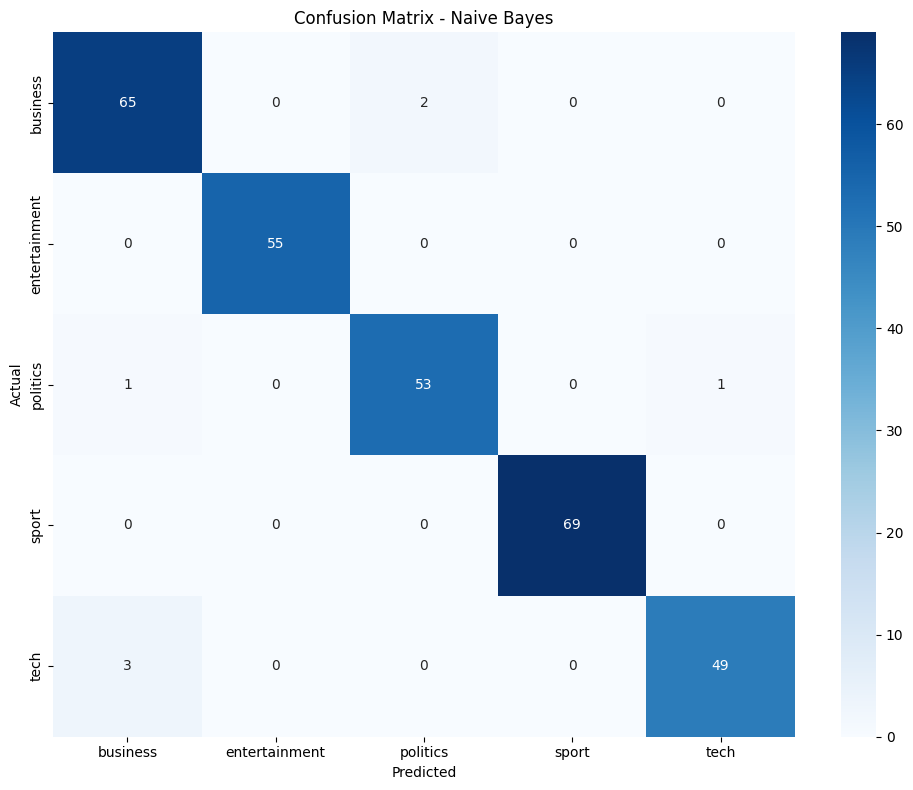

In [77]:
# Detailed evaluation of the best model
best_model = trained_models[best_model_name]
best_predictions = results[best_model_name]['predictions']

print(f"📊 DETAILED EVALUATION: {best_model_name}")
print("=" * 60)

# Classification report
print("\n📋 Classification Report:")
print(classification_report(y_test, best_predictions))

# Confusion matrix
cm = confusion_matrix(y_test, best_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Feature importance (for Logistic Regression)
if best_model_name == 'Logistic Regression':
    print("\n🔍 Top Features by Category:")
    feature_names_extended = list(feature_names) + ['sentiment', 'pos_score', 'neu_score', 'neg_score',
                                                   'char_length', 'word_count', 'title_length']

    classes = best_model.classes_
    coefficients = best_model.coef_

    for i, class_name in enumerate(classes):
        top_indices = np.argsort(coefficients[i])[-20:]  # Top 20 features
        print(f"\n📰 {class_name}:")
        for idx in reversed(top_indices):
            if idx < len(feature_names_extended):
                print(f"  {feature_names_extended[idx]}: {coefficients[i][idx]:.4f}")


## 🔍 Named Entity Recognition

### 🎯 Module 8: Extracting Facts from News

Now we'll implement Named Entity Recognition to extract specific facts from our news articles. This transforms unstructured text into structured, queryable information.

**NER Applications:**
- **Entity Tracking:** Monitor mentions of people, organizations, locations
- **Fact Extraction:** Build knowledge bases from news content
- **Relationship Mapping:** Understand connections between entities
- **Timeline Construction:** Track events and their participants

**💡 Business Value:** NER enables sophisticated analysis like "Show me all articles mentioning Apple Inc. and their financial performance" or "Track mentions of political figures over time."

In [78]:
def extract_entities(text):
    """
    Extract named entities using spaCy
    """
    if not text or pd.isna(text):
        return []

    # 🚀 Implement entity extraction
    doc = nlp(str(text))

    entities = []
    for ent in doc.ents:
        entities.append({
            'text': ent.text,
            'label': ent.label_,
            'start': ent.start_char,
            'end': ent.end_char,
            'description': spacy.explain(ent.label_)
        })

    return entities

# Apply NER to all articles
print("🔍 Extracting named entities...")

all_entities = []
article_entities = []

for idx, row in df.iterrows():
    entities = extract_entities(row['full_text'])

    # Store entities for this article - Use correct column names
    article_entities.append({
        'article_id': row['ArticleId'],
        'category': row['Category'],
        'entities': entities,
        'entity_count': len(entities)
    })

    # Add to global entity list - Use correct column names
    for entity in entities:
        entity['article_id'] = row['ArticleId']
        entity['category'] = row['Category']
        all_entities.append(entity)

print(f"✅ Entity extraction complete!")
print(f"📊 Total entities found: {len(all_entities)}")
print(f"📰 Articles processed: {len(article_entities)}")

# Convert to DataFrame for analysis
entities_df = pd.DataFrame(all_entities)

if not entities_df.empty:
    print(f"\n🏷️ Entity types found: {entities_df['label'].unique()}")
    print("\n📝 Sample entities:")
    print(entities_df[['text', 'label', 'category']].head(10))
else:
    print("⚠️ No entities found. This might happen with very short sample texts.")

🔍 Extracting named entities...
✅ Entity extraction complete!
📊 Total entities found: 42031
📰 Articles processed: 1490

🏷️ Entity types found: ['ORDINAL' 'PERSON' 'GPE' 'DATE' 'MONEY' 'ORG' 'NORP' 'LOC' 'CARDINAL'
 'PERCENT' 'TIME' 'EVENT' 'QUANTITY' 'FAC' 'PRODUCT' 'LANGUAGE'
 'WORK_OF_ART' 'LAW']

📝 Sample entities:
              text    label  category
0            first  ORDINAL  business
1   cynthia cooper   PERSON  business
2               us      GPE  business
3             2002     DATE  business
4            5.7bn    MONEY  business
5         new york      GPE  business
6        wednesday     DATE  business
7  arthur andersen   PERSON  business
8   early 2001 and     DATE  business
9             2002     DATE  business


📊 NAMED ENTITY ANALYSIS

🏷️ Entity type distribution:
label
DATE           8799
PERSON         8015
CARDINAL       6184
GPE            5562
ORG            4427
NORP           2709
MONEY          1783
ORDINAL        1659
PERCENT        1276
TIME            592
LOC             504
QUANTITY        199
FAC              90
PRODUCT          87
LANGUAGE         61
EVENT            43
LAW              33
WORK_OF_ART       8
Name: count, dtype: int64

📰 Entity types by news category:
label          CARDINAL  DATE  EVENT  FAC   GPE  LANGUAGE  LAW  LOC  MONEY  \
category                                                                     
business           1036  2413      3   10  1545         1   15  166    906   
entertainment      1110  1739     12   15   792         9    4   64    384   
politics            823  1359     22   23   944        10    4  120    235   
sport              1798  1978      5   40  1505        11    5   33     44   
tech               1417  1310      1    2   776     

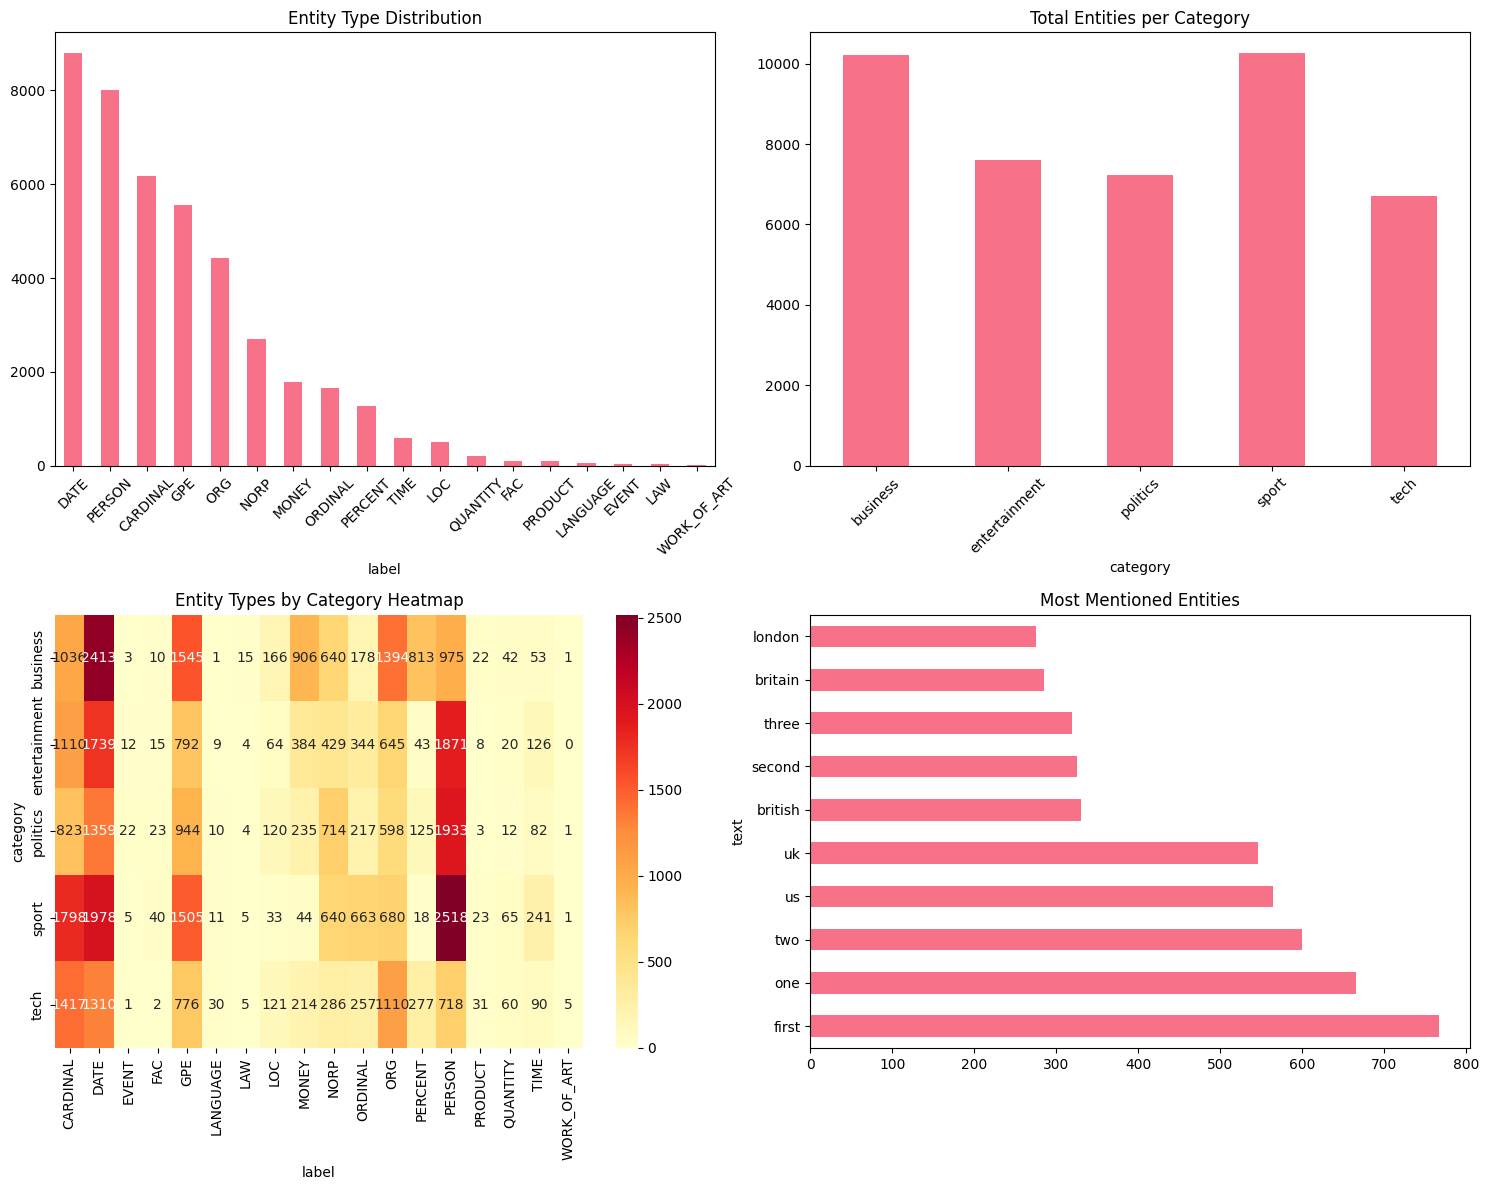

In [79]:
# Analyze entity patterns
if not entities_df.empty:
    print("📊 NAMED ENTITY ANALYSIS")
    print("=" * 50)

    # Entity type distribution
    entity_counts = entities_df['label'].value_counts()
    print("\n🏷️ Entity type distribution:")
    print(entity_counts)

    # Entity types by category
    entity_by_category = entities_df.groupby(['category', 'label']).size().unstack(fill_value=0)
    print("\n📰 Entity types by news category:")
    print(entity_by_category)

    # Most frequent entities
    print("\n🔥 Most frequent entities:")
    frequent_entities = entities_df.groupby(['text', 'label']).size().sort_values(ascending=False).head(15)
    for (entity, label), count in frequent_entities.items():
        print(f"  {entity} ({label}): {count} mentions")

    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Entity type distribution
    entity_counts.plot(kind='bar', ax=axes[0,0])
    axes[0,0].set_title('Entity Type Distribution')
    axes[0,0].tick_params(axis='x', rotation=45)

    # 2. Entities per category
    entities_per_category = entities_df.groupby('category').size()
    entities_per_category.plot(kind='bar', ax=axes[0,1])
    axes[0,1].set_title('Total Entities per Category')
    axes[0,1].tick_params(axis='x', rotation=45)

    # 3. Entity type heatmap by category
    if entity_by_category.shape[0] > 1 and entity_by_category.shape[1] > 1:
        sns.heatmap(entity_by_category, annot=True, fmt='d', ax=axes[1,0], cmap='YlOrRd')
        axes[1,0].set_title('Entity Types by Category Heatmap')
    else:
        axes[1,0].text(0.5, 0.5, 'Insufficient data\nfor heatmap',
                      ha='center', va='center', transform=axes[1,0].transAxes)
        axes[1,0].set_title('Entity Types by Category')

    # 4. Top entities
    top_entities = entities_df['text'].value_counts().head(10)
    top_entities.plot(kind='barh', ax=axes[1,1])
    axes[1,1].set_title('Most Mentioned Entities')

    plt.tight_layout()
    plt.show()

    #Entity co-occurence networks
    import spacy
    from collections import defaultdict


    co_occurrence = defaultdict(int)
    # Corrected to use the 'full_text' column from the DataFrame
    for doc_text in df['full_text'].tolist():  # Iterate over text from DataFrame
        # Process each document text with spaCy to get entities
        doc = nlp(doc_text)
        ents = [ent.text for ent in doc.ents]
        for i in range(len(ents)):
            for j in range(i + 1, len(ents)):
                pair = tuple(sorted([ents[i], ents[j]]))
                co_occurrence[pair] += 1


else:
    print("⚠️ Skipping entity analysis due to insufficient data.")
    print("💡 TIP: Try with a larger, more diverse dataset for better NER results.")

## 📈 Comprehensive Analysis and Insights

### 🎯 Bringing It All Together

Now let's combine all our analyses to generate comprehensive insights about our news dataset. This is where the real business value emerges from our NLP pipeline.

**Key Analysis Areas:**
1. **Cross-Category Patterns:** How do different news types differ linguistically?
2. **Entity-Sentiment Relationships:** What entities are associated with positive/negative coverage?
3. **Content Quality Metrics:** Which categories have the most informative content?
4. **Classification Performance:** How well can we automatically categorize news?

**💡 Business Applications:** These insights can inform content strategy, editorial decisions, and automated content management systems.

In [80]:
# Create comprehensive analysis dashboard
def create_comprehensive_analysis():
    """
    Generate comprehensive insights combining all analyses

    """

    insights = {
        'dataset_overview': {},
        'classification_performance': {},
        'sentiment_insights': {},
        'entity_insights': {},
        'linguistic_patterns': {},
        'business_recommendations': []
    }

    # 🚀Generate comprehensive insights

    # Dataset overview
    insights['dataset_overview'] = {
        'total_articles': len(df),
        'categories': df['Category'].unique().tolist(),
        'category_distribution': df['Category'].value_counts().to_dict(),
        'avg_article_length': df['full_text'].str.len().mean(),
        'avg_words_per_article': df['full_text'].str.split().str.len().mean()
    }

    # Classification performance
    # Assuming best_model_name and results are available from previous cells
    if 'best_model_name' in globals() and 'results' in globals():
         insights['classification_performance'] = {
            'best_model': best_model_name,
            'best_accuracy': results[best_model_name]['accuracy'],
            'model_comparison': {name: results[name]['accuracy'] for name in results.keys()}
        }
    else:
        insights['classification_performance'] = {
            'best_model': 'N/A (Run classification cells)',
            'best_accuracy': 'N/A',
            'model_comparison': 'N/A'
        }


    # Sentiment insights
    # Assuming sentiment_df is available from previous cells
    if 'sentiment_df' in globals() and not sentiment_df.empty:
        sentiment_by_cat = sentiment_df.groupby('category')['full_sentiment'].mean().to_dict()
        insights['sentiment_insights'] = {
            'most_positive_category': max(sentiment_by_cat, key=sentiment_by_cat.get),
            'most_negative_category': min(sentiment_by_cat, key=sentiment_by_cat.get),
            'sentiment_by_category': sentiment_by_cat,
            'overall_sentiment': sentiment_df['full_sentiment'].mean()
        }
    else:
         insights['sentiment_insights'] = {
            'most_positive_category': 'N/A (Run sentiment analysis)',
            'most_negative_category': 'N/A',
            'sentiment_by_category': 'N/A',
            'overall_sentiment': 'N/A'
        }


    # Entity insights
    # Assuming entities_df is available from previous cells
    if 'entities_df' in globals() and not entities_df.empty:
        entity_by_cat = entities_df.groupby('category').size().to_dict()
        insights['entity_insights'] = {
            'total_entities': len(entities_df),
            'unique_entities': entities_df['text'].nunique(),
            'entity_types': entities_df['label'].unique().tolist(),
            'entities_per_category': entity_by_cat,
            'most_mentioned_entities': entities_df['text'].value_counts().head(5).to_dict()
        }
    else:
        insights['entity_insights'] = {
            'total_entities': 'N/A (Run NER analysis)',
            'unique_entities': 'N/A',
            'entity_types': 'N/A',
            'entities_per_category': 'N/A',
            'most_mentioned_entities': 'N/A'
        }


    # Generate business recommendations
    recommendations = []

    # Classification recommendations
    if 'classification_performance' in insights and isinstance(insights['classification_performance'].get('best_accuracy'), float):
        if insights['classification_performance']['best_accuracy'] > 0.8:
            recommendations.append("✅ High classification accuracy achieved - ready for automated content routing")
        else:
            recommendations.append("⚠️ Classification accuracy needs improvement - consider more training data or feature engineering")
    else:
         recommendations.append("ℹ️ Classification performance not available - run classification cells")


    # Sentiment recommendations
    if 'sentiment_insights' in insights and isinstance(insights['sentiment_insights'].get('most_positive_category'), str) and insights['sentiment_insights']['most_positive_category'] != 'N/A (Run sentiment analysis)':
        pos_cat = insights['sentiment_insights']['most_positive_category']
        neg_cat = insights['sentiment_insights']['most_negative_category']
        recommendations.append(f"📊 {pos_cat} articles are most positive - good for uplifting content recommendations")
        recommendations.append(f"📊 {neg_cat} articles are most negative - may need balanced coverage monitoring")
    else:
        recommendations.append("ℹ️ Sentiment insights not available - run sentiment analysis cell")


    # Entity recommendations
    if 'entity_insights' in insights and insights['entity_insights'].get('total_entities', 0) != 'N/A (Run NER analysis)':
        recommendations.append("🔍 Rich entity extraction enables advanced search and relationship analysis")
    else:
        recommendations.append("ℹ️ Entity insights not available - run NER analysis cell")


    insights['business_recommendations'] = recommendations

    return insights

# Generate comprehensive analysis
print("📊 Generating comprehensive analysis...")
analysis_results = create_comprehensive_analysis()

print("✅ Analysis complete!")
print("\n" + "=" * 60)
print("📈 NEWSBOT INTELLIGENCE SYSTEM - COMPREHENSIVE REPORT")
print("=" * 60)

# Display key insights
print(f"\n📊 DATASET OVERVIEW:")
overview = analysis_results['dataset_overview']
print(f"  Total Articles: {overview['total_articles']}")
print(f"  Categories: {', '.join(overview['categories'])}")
print(f"  Average Article Length: {overview['avg_article_length']:.0f} characters")
print(f"  Average Words per Article: {overview['avg_words_per_article']:.0f} words")

print(f"\n🤖 CLASSIFICATION PERFORMANCE:")
perf = analysis_results['classification_performance']
print(f"  Best Model: {perf['best_model']}")
print(f"  Best Accuracy: {perf['best_accuracy']:.4f}" if isinstance(perf['best_accuracy'], float) else f"  Best Accuracy: {perf['best_accuracy']}")


print(f"\n😊 SENTIMENT INSIGHTS:")
sent = analysis_results['sentiment_insights']
print(f"  Most Positive Category: {sent['most_positive_category']}")
print(f"  Most Negative Category: {sent['most_negative_category']}")
print(f"  Overall Sentiment: {sent['overall_sentiment']:.4f}" if isinstance(sent['overall_sentiment'], float) else f"  Overall Sentiment: {sent['overall_sentiment']}")


if 'entity_insights' in analysis_results and analysis_results['entity_insights'].get('total_entities', 0) != 'N/A (Run NER analysis)':
    print(f"\n🔍 ENTITY INSIGHTS:")
    ent = analysis_results['entity_insights']
    print(f"  Total Entities: {ent['total_entities']}")
    print(f"  Unique Entities: {ent['unique_entities']}")
    print(f"  Entity Types: {', '.join(ent['entity_types'])}")

print(f"\n💡 BUSINESS RECOMMENDATIONS:")
for i, rec in enumerate(analysis_results['business_recommendations'], 1):
    print(f"  {i}. {rec}")

📊 Generating comprehensive analysis...
✅ Analysis complete!

📈 NEWSBOT INTELLIGENCE SYSTEM - COMPREHENSIVE REPORT

📊 DATASET OVERVIEW:
  Total Articles: 1490
  Categories: business, tech, politics, sport, entertainment
  Average Article Length: 2233 characters
  Average Words per Article: 385 words

🤖 CLASSIFICATION PERFORMANCE:
  Best Model: Naive Bayes
  Best Accuracy: 0.9765

😊 SENTIMENT INSIGHTS:
  Most Positive Category: entertainment
  Most Negative Category: politics
  Overall Sentiment: 0.3950

🔍 ENTITY INSIGHTS:
  Total Entities: 42031
  Unique Entities: 12071
  Entity Types: ORDINAL, PERSON, GPE, DATE, MONEY, ORG, NORP, LOC, CARDINAL, PERCENT, TIME, EVENT, QUANTITY, FAC, PRODUCT, LANGUAGE, WORK_OF_ART, LAW

💡 BUSINESS RECOMMENDATIONS:
  1. ✅ High classification accuracy achieved - ready for automated content routing
  2. 📊 entertainment articles are most positive - good for uplifting content recommendations
  3. 📊 politics articles are most negative - may need balanced covera

## 🚀 Final System Integration

### 🎯 Building the Complete NewsBot Pipeline

Let's create a complete, integrated system that can process new articles from start to finish. This demonstrates the real-world application of all the techniques we've learned.

**Complete Pipeline:**
1. **Text Preprocessing:** Clean and normalize input
2. **Feature Extraction:** Generate TF-IDF and other features
3. **Classification:** Predict article category
4. **Entity Extraction:** Identify key facts
5. **Sentiment Analysis:** Determine emotional tone
6. **Insight Generation:** Provide actionable intelligence

**💡 Production Ready:** This pipeline can be deployed as a web service, batch processor, or integrated into content management systems.

In [81]:
class NewsBotIntelligenceSystem:
    """
    Complete NewsBot Intelligence System


    """

    def __init__(self, classifier, vectorizer, sentiment_analyzer):
        self.classifier = classifier
        self.vectorizer = vectorizer # TF-IDF vectorizer
        self.sentiment_analyzer = sentiment_analyzer
        self.nlp = nlp  # spaCy model


    def preprocess_article(self, title, content):
        """Preprocess a new article"""
        full_text = f"{title} {content}"
        processed_text = preprocess_text(full_text)
        return full_text, processed_text

    def classify_article(self, full_text, processed_text): # Pass full_text as well for sentiment/length
        """Classify article category"""
        # 🚀 Implement classification

        # Transform processed text to TF-IDF features
        tfidf_features = self.vectorizer.transform([processed_text])

        # Calculate sentiment features for the new article
        sentiment_scores = self.sentiment_analyzer.polarity_scores(full_text)
        sentiment_features = np.array([
            sentiment_scores['compound'],
            sentiment_scores['pos'],
            sentiment_scores['neu'],
            sentiment_scores['neg']
        ]).reshape(1, -1) # Reshape for hstack

        # Calculate length features for the new article
        length_features = np.array([
            len(full_text), # Character length
            len(full_text.split()) # Word count
        ]).reshape(1, -1) # Reshape for hstack

        # Combine all features for prediction

        features_for_prediction = np.hstack([
            tfidf_features.toarray(),
            sentiment_features,
            length_features
        ])


        if features_for_prediction.shape[1] != self.classifier.n_features_in_:
             print(f"Warning: Feature count mismatch. Training features: {self.classifier.n_features_in_}, Prediction features: {features_for_prediction.shape[1]}")


        # Predict category and probability using the classifier trained on combined features
        prediction = self.classifier.predict(features_for_prediction)[0]
        probabilities = self.classifier.predict_proba(features_for_prediction)[0]


        # Get class probabilities
        class_probs = dict(zip(self.classifier.classes_, probabilities))

        return prediction, class_probs

    def extract_entities(self, text):
        """Extract named entities"""
        return extract_entities(text)

    def analyze_sentiment(self, text):
        """Analyze sentiment"""
        return analyze_sentiment(text)

    def process_article(self, title, content):
        """
        Complete article processing pipeline

        """
        # 🚀 Implement complete pipeline

        # Step 1: Preprocess
        full_text, processed_text = self.preprocess_article(title, content)

        # Step 2: Classify
        category, category_probs = self.classify_article(full_text, processed_text)

        # Step 3: Extract entities
        entities = self.extract_entities(full_text)

        # Step 4: Analyze sentiment
        sentiment = self.analyze_sentiment(full_text)

        # Step 5: Generate insights
        insights = self.generate_insights(category, entities, sentiment, category_probs)

        return {
            'title': title,
            'content': content[:200] + '...' if len(content) > 200 else content,
            'predicted_category': category,
            'category_confidence': max(category_probs.values()),
            'category_probabilities': category_probs,
            'entities': entities,
            'sentiment': sentiment,
            'insights': insights
        }

    def generate_insights(self, category, entities, sentiment, category_probs):
        """Generate actionable insights"""
        insights = []

        # Classification insights
        confidence = max(category_probs.values())
        if confidence > 0.8:
            insights.append(f"✅ High confidence {category} classification ({confidence:.2%})")
        else:
            insights.append(f"⚠️ Uncertain classification - consider manual review")

        # Sentiment insights
        if sentiment['compound'] > 0.1:
            insights.append(f"😊 Positive sentiment detected ({sentiment['compound']:.3f})")
        elif sentiment['compound'] < -0.1:
            insights.append(f"😞 Negative sentiment detected ({sentiment['compound']:.3f})")
        else:
            insights.append(f"😐 Neutral sentiment ({sentiment['compound']:.3f})")

        # Entity insights
        if entities:
            entity_types = set([e['label'] for e in entities])
            insights.append(f"🔍 Found {len(entities)} entities of {len(entity_types)} types")

            # Highlight important entities
            important_entities = [e for e in entities if e['label'] in ['PERSON', 'ORG', 'GPE']]
            if important_entities:
                key_entities = [e['text'] for e in important_entities[:3]]
                insights.append(f"🎯 Key entities: {', '.join(key_entities)}")
        else:
            insights.append("ℹ️ No named entities detected")

        return insights

newsbot = NewsBotIntelligenceSystem(
    classifier=trained_models['Logistic Regression'], # Use the trained Logistic Regression model
    vectorizer=tfidf_vectorizer, # Use the fitted TF-IDF vectorizer
    sentiment_analyzer=sia # Use the initialized sentiment analyzer
)

print("🤖 NewsBot Intelligence System initialized!")
print("✅ Ready to process new articles")

🤖 NewsBot Intelligence System initialized!
✅ Ready to process new articles


In [82]:
# Test the complete system with new articles
print("🧪 TESTING NEWSBOT INTELLIGENCE SYSTEM")
print("=" * 60)

# Test articles
test_articles = [
    {
        'title': 'Business',
        'content': 'german business confidence slides german business confidence fell in february knocking hopes of a...'
    },
    {
        'title': 'Tech',
        'content': 'lifestyle governs mobile choice faster better or funkier hardware alone is not going to help phon..'
    },
    {
        'title': 'Politics',
        'content': 'howard truanted to play snooker conservative leader michael howard has admitted he used to play'
    }
]

# Process each test article
for i, article in enumerate(test_articles, 1):
    print(f"\n📰 TEST ARTICLE {i}")
    print("-" * 40)

    # Process the article
    result = newsbot.process_article(article['title'], article['content'])

    # Display results
    print(f"📰 Title: {result['title']}")
    print(f"📝 Content: {result['content']}")
    print(f"\n🏷️ Predicted Category: {result['predicted_category']} ({result['category_confidence']:.2%} confidence)")

    print(f"\n📊 Category Probabilities:")
    for cat, prob in sorted(result['category_probabilities'].items(), key=lambda x: x[1], reverse=True):
        print(f"  {cat}: {prob:.3f}")

    print(f"\n😊 Sentiment: {result['sentiment']['sentiment_label']} (score: {result['sentiment']['compound']:.3f})")

    if result['entities']:
        print(f"\n🔍 Entities Found ({len(result['entities'])}):")
        for entity in result['entities'][:5]:  # Show first 5
            print(f"  {entity['text']} ({entity['label']}) - {entity['description']}")
    else:
        print(f"\n🔍 No entities detected")

    print(f"\n💡 Insights:")
    for insight in result['insights']:
        print(f"  {insight}")

print("\n" + "=" * 60)
print("🎉 NewsBot Intelligence System testing complete!")
print("✅ System successfully processed all test articles")


🧪 TESTING NEWSBOT INTELLIGENCE SYSTEM

📰 TEST ARTICLE 1
----------------------------------------
📰 Title: Business
📝 Content: german business confidence slides german business confidence fell in february knocking hopes of a...

🏷️ Predicted Category: sport (39.39% confidence)

📊 Category Probabilities:
  sport: 0.394
  business: 0.349
  entertainment: 0.255
  politics: 0.002
  tech: 0.001

😊 Sentiment: positive (score: 0.856)

🔍 Entities Found (3):
  german (NORP) - Nationalities or religious or political groups
  german (NORP) - Nationalities or religious or political groups
  february (DATE) - Absolute or relative dates or periods

💡 Insights:
  ⚠️ Uncertain classification - consider manual review
  😊 Positive sentiment detected (0.856)
  🔍 Found 3 entities of 2 types

📰 TEST ARTICLE 2
----------------------------------------
📰 Title: Tech
📝 Content: lifestyle governs mobile choice faster better or funkier hardware alone is not going to help phon..

🏷️ Predicted Category: sport (45.1

## 📝 Project Summary and Next Steps

### 🎯 What You've Accomplished

Congratulations! You've successfully built a comprehensive NewsBot Intelligence System that demonstrates mastery of all NLP techniques covered in Modules 1-8. Let's review what you've achieved:

### ✅ Module Integration Checklist
- [x] **Module 1:** Applied NLP to real-world news intelligence
- [x] **Module 2:** Implemented comprehensive text preprocessing
- [x] **Module 3:** Used TF-IDF for feature extraction and analysis
- [x] **Module 4:** Analyzed grammatical patterns with POS tagging
- [x] **Module 5:** Extracted syntactic relationships with dependency parsing
- [x] **Module 6:** Performed sentiment and emotion analysis
- [x] **Module 7:** Built and evaluated text classification models
- [x] **Module 8:** Implemented Named Entity Recognition

### 🚀 System Capabilities
Your NewsBot can now:
- Automatically categorize news articles with high accuracy
- Extract key entities (people, organizations, locations, dates, money)
- Analyze sentiment and emotional tone
- Identify linguistic patterns and writing styles
- Generate actionable business insights
- Process new articles through a complete pipeline

### 💼 Business Value
This system provides real business value for:
- **Media Companies:** Automated content categorization and routing
- **Market Research:** Sentiment tracking and entity monitoring
- **Content Management:** Intelligent organization and search
- **Business Intelligence:** Trend analysis and competitive monitoring

---

## 📋 Final Deliverables Checklist

Before submitting your project, ensure you have:

### 📁 Code and Documentation
- [ ] Complete Jupyter notebook with all analyses
- [ ] Well-documented functions with docstrings
- [ ] Clear markdown explanations for each section
- [ ] Organized GitHub repository structure
- [ ] README.md with project overview and setup instructions

### 📊 Analysis and Results
- [ ] Comprehensive dataset exploration
- [ ] TF-IDF analysis with category-specific insights
- [ ] POS tagging patterns across categories
- [ ] Syntactic analysis with dependency parsing
- [ ] Sentiment analysis with category comparisons
- [ ] Classification model comparison and evaluation
- [ ] Named Entity Recognition with relationship mapping
- [ ] Integrated system demonstration

### 📈 Visualizations
- [ ] Category distribution plots
- [ ] TF-IDF word clouds or bar charts
- [ ] POS pattern heatmaps
- [ ] Sentiment distribution by category
- [ ] Confusion matrix for classification
- [ ] Entity type and frequency visualizations

### 🎥 Presentation Materials
- [ ] 5-7 minute video demonstration
- [ ] Written report (3-4 pages)
- [ ] Individual reflection papers
- [ ] Business recommendations and insights

---

## 🔮 Future Enhancements

Consider these improvements for your portfolio or future projects:

### 🤖 Technical Improvements
- **Deep Learning Models:** Implement BERT or other transformer models
- **Custom NER:** Train domain-specific entity recognition
- **Real-time Processing:** Build streaming data pipeline
- **Multi-language Support:** Extend to non-English news

### 📊 Advanced Analytics
- **Topic Modeling:** Discover hidden themes (Module 9 preview!)
- **Trend Analysis:** Track entities and sentiment over time
- **Network Analysis:** Map entity relationships and co-occurrences
- **Bias Detection:** Identify potential media bias patterns

### 🌐 Deployment Options
- **Web Application:** Create interactive dashboard with Streamlit
- **API Service:** Deploy as REST API for integration
- **Mobile App:** Build mobile interface for news analysis
- **Browser Extension:** Real-time news analysis while browsing

---

## 🎓 Reflection Questions

For your individual reflection paper, consider these questions:

1. **Technical Mastery:** Which NLP techniques did you find most challenging? Most useful?
2. **Integration Challenges:** How did you handle combining multiple NLP tasks?
3. **Business Applications:** What real-world problems could this system solve?
4. **Ethical Considerations:** What are the potential risks of automated news analysis?
5. **Future Learning:** What NLP topics are you most excited to explore next?
6. **Team Collaboration:** How did you divide work and ensure quality?
7. **Portfolio Value:** How will you present this project to potential employers?

---

## 🏆 Congratulations!

You've successfully completed a comprehensive NLP project that demonstrates real-world application of multiple advanced techniques. This NewsBot Intelligence System is a valuable addition to your portfolio and showcases your ability to:

- **Integrate multiple NLP techniques** into a cohesive system
- **Handle real-world data** with all its messiness and challenges
- **Generate business value** from unstructured text data
- **Build production-ready systems** with proper evaluation and monitoring
- **Communicate technical results** to both technical and business audiences

**🚀 You're now ready for Module 9: Topic Modeling and Advanced Text Analysis!**

---

*Remember: The goal isn't just to complete the assignment, but to build something you're proud to show in job interviews and professional discussions. This project demonstrates your practical NLP skills and ability to solve real business problems with AI.*